## Transformación de datos

In [2]:
# Librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import os


In [3]:
# Cargamos los datos a dataframe
game_data = pd.read_csv('../csv/game.csv')
team_data = pd.read_csv('../csv//team.csv')
team_details_data = pd.read_csv('../csv//team_details.csv')


In [69]:
# Verificamos info de df game_data
game_data.head()

season_id  team_id_home team_abbreviation_home           team_name_home  \
0      21946    1610610035                    HUS          Toronto Huskies   
1      21946    1610610034                    BOM        St. Louis Bombers   
2      21946    1610610032                    PRO  Providence Steamrollers   
3      21946    1610610025                    CHS            Chicago Stags   
4      21946    1610610028                    DEF          Detroit Falcons   

    game_id            game_date matchup_home wl_home  min  fgm_home  ...  \
0  24600001  1946-11-01 00:00:00  HUS vs. NYK       L    0      25.0  ...   
1  24600003  1946-11-02 00:00:00  BOM vs. PIT       W    0      20.0  ...   
2  24600002  1946-11-02 00:00:00  PRO vs. BOS       W    0      21.0  ...   
3  24600004  1946-11-02 00:00:00  CHS vs. NYK       W    0      21.0  ...   
4  24600005  1946-11-02 00:00:00  DEF vs. WAS       L    0      10.0  ...   

   reb_away  ast_away  stl_away  blk_away  tov_away  pf_away  pts_away  \
0       NaN       NaN       NaN       NaN       NaN      NaN      68.0   
1       NaN       NaN       NaN       NaN       NaN     25.0      51.0   
2       NaN       NaN       NaN       NaN       NaN      NaN      53.0   
3       NaN       NaN       NaN       NaN       NaN     22.0      47.0   
4       NaN       NaN       NaN       NaN       NaN      NaN      50.0   

   plus_minus_away  video_available_away     season_type  
0                2                     0  Regular Season  
1               -5                     0  Regular Season  
2               -6                     0  Regular Season  
3              -16                     0  Regular Season  
4               17                     0  Regular Season  

[5 rows x 55 columns]

In [70]:
# Verificamos info de df team_data
team_data.head()


id             full_name abbreviation   nickname         city  \
0  1610612737         Atlanta Hawks          ATL      Hawks      Atlanta   
1  1610612738        Boston Celtics          BOS    Celtics       Boston   
2  1610612739   Cleveland Cavaliers          CLE  Cavaliers    Cleveland   
3  1610612740  New Orleans Pelicans          NOP   Pelicans  New Orleans   
4  1610612741         Chicago Bulls          CHI      Bulls      Chicago   

           state  year_founded  
0        Atlanta        1949.0  
1  Massachusetts        1946.0  
2           Ohio        1970.0  
3      Louisiana        2002.0  
4       Illinois        1966.0

In [71]:
# Verificamos info de df team_details_data
team_details_data.head()

team_id abbreviation   nickname  yearfounded          city  \
0  1610612737          ATL      Hawks       1949.0       Atlanta   
1  1610612741          CHI      Bulls       1966.0       Chicago   
2  1610612742          DAL  Mavericks       1980.0        Dallas   
3  1610612743          DEN    Nuggets       1976.0        Denver   
4  1610612744          GSW   Warriors       1946.0  Golden State   

                      arena  arenacapacity              owner  \
0          State Farm Arena        18729.0       Tony Ressler   
1             United Center        21711.0  Michael Reinsdorf   
2  American Airlines Center        19200.0         Mark Cuban   
3                Ball Arena            NaN       Stan Kroenke   
4              Chase Center            NaN          Joe Lacob   

       generalmanager       headcoach     dleagueaffiliation  \
0      Travis Schlenk     Quin Snyder  College Park Skyhawks   
1  Arturas Karnisovas   Billy Donovan       Windy City Bulls   
2       Nico Harrison      Jason Kidd          Texas Legends   
3        Calvin Booth  Michael Malone      Grand Rapids Gold   
4           Bob Myers      Steve Kerr    Santa Cruz Warriors   

                                 facebook                           instagram  \
0          https://www.facebook.com/hawks      https://instagram.com/atlhawks   
1   https://www.facebook.com/chicagobulls  https://instagram.com/chicagobulls   
2     https://www.facebook.com/dallasmavs    https://instagram.com/dallasmavs   
3  https://www.facebook.com/DenverNuggets       https://instagram.com/nuggets   
4       https://www.facebook.com/warriors      https://instagram.com/warriors   

                            twitter  
0      https://twitter.com/ATLHawks  
1  https://twitter.com/chicagobulls  
2    https://twitter.com/dallasmavs  
3       https://twitter.com/nuggets  
4      https://twitter.com/warriors

In [72]:
# Utilizamos la columna game_date para como date para un análisis temporal
game_data['game_date'] = pd.to_datetime(game_data['game_date'])

In [73]:
# Verificamos la conversión
print(game_data.head())
print(game_data.dtypes)

   season_id  team_id_home team_abbreviation_home           team_name_home  \
0      21946    1610610035                    HUS          Toronto Huskies   
1      21946    1610610034                    BOM        St. Louis Bombers   
2      21946    1610610032                    PRO  Providence Steamrollers   
3      21946    1610610025                    CHS            Chicago Stags   
4      21946    1610610028                    DEF          Detroit Falcons   

    game_id  game_date matchup_home wl_home  min  fgm_home  ...  reb_away  \
0  24600001 1946-11-01  HUS vs. NYK       L    0      25.0  ...       NaN   
1  24600003 1946-11-02  BOM vs. PIT       W    0      20.0  ...       NaN   
2  24600002 1946-11-02  PRO vs. BOS       W    0      21.0  ...       NaN   
3  24600004 1946-11-02  CHS vs. NYK       W    0      21.0  ...       NaN   
4  24600005 1946-11-02  DEF vs. WAS       L    0      10.0  ...       NaN   

   ast_away  stl_away  blk_away  tov_away  pf_away  pts_away  plus_m

In [74]:
# Filtramos las filas donde 'game_date' es posterior a 2013
game_data = game_data[game_data['game_date'].dt.year >= 2013]

# Verificamos el DataFrame resultante
game_data.head()


season_id  team_id_home team_abbreviation_home        team_name_home  \
52071      42012    1610612743                    DEN        Denver Nuggets   
52072      42012    1610612751                    BKN         Brooklyn Nets   
52073      42012    1610612752                    NYK       New York Knicks   
52074      42012    1610612746                    LAC  Los Angeles Clippers   
52075      42012    1610612754                    IND        Indiana Pacers   

        game_id  game_date matchup_home wl_home  min  fgm_home  ...  reb_away  \
52071  41200161 2013-04-20  DEN vs. GSW       W  240      38.0  ...      55.0   
52072  41200131 2013-04-20  BKN vs. CHI       W  240      43.0  ...      35.0   
52073  41200111 2013-04-20  NYK vs. BOS       W  240      32.0  ...      40.0   
52074  41200171 2013-04-20  LAC vs. MEM       W  240      41.0  ...      23.0   
52075  41200121 2013-04-21  IND vs. ATL       W  240      35.0  ...      32.0   

       ast_away  stl_away  blk_away  tov_away  pf_away  pts_away  \
52071      27.0       4.0      10.0      18.0     21.0      95.0   
52072      15.0       4.0       5.0      10.0     17.0      89.0   
52073      18.0       5.0       5.0      21.0     17.0      78.0   
52074      22.0       3.0       1.0       7.0     29.0      91.0   
52075      23.0       5.0       3.0      16.0     26.0      90.0   

       plus_minus_away  video_available_away  season_type  
52071               -2                     1     Playoffs  
52072              -17                     1     Playoffs  
52073               -7                     1     Playoffs  
52074              -21                     0     Playoffs  
52075              -17                     1     Playoffs  

[5 rows x 55 columns]

In [75]:
# Creamos una columna de año
game_data['year'] = game_data['game_date'].dt.year
game_data.head()

season_id  team_id_home team_abbreviation_home        team_name_home  \
52071      42012    1610612743                    DEN        Denver Nuggets   
52072      42012    1610612751                    BKN         Brooklyn Nets   
52073      42012    1610612752                    NYK       New York Knicks   
52074      42012    1610612746                    LAC  Los Angeles Clippers   
52075      42012    1610612754                    IND        Indiana Pacers   

        game_id  game_date matchup_home wl_home  min  fgm_home  ...  ast_away  \
52071  41200161 2013-04-20  DEN vs. GSW       W  240      38.0  ...      27.0   
52072  41200131 2013-04-20  BKN vs. CHI       W  240      43.0  ...      15.0   
52073  41200111 2013-04-20  NYK vs. BOS       W  240      32.0  ...      18.0   
52074  41200171 2013-04-20  LAC vs. MEM       W  240      41.0  ...      22.0   
52075  41200121 2013-04-21  IND vs. ATL       W  240      35.0  ...      23.0   

       stl_away  blk_away  tov_away  pf_away  pts_away  plus_minus_away  \
52071       4.0      10.0      18.0     21.0      95.0               -2   
52072       4.0       5.0      10.0     17.0      89.0              -17   
52073       5.0       5.0      21.0     17.0      78.0               -7   
52074       3.0       1.0       7.0     29.0      91.0              -21   
52075       5.0       3.0      16.0     26.0      90.0              -17   

       video_available_away  season_type  year  
52071                     1     Playoffs  2013  
52072                     1     Playoffs  2013  
52073                     1     Playoffs  2013  
52074                     0     Playoffs  2013  
52075                     1     Playoffs  2013  

[5 rows x 56 columns]

In [76]:
# Definimos los equipos de la NBA por conferencia
conferencia_este = [
    "Boston Celtics", "Brooklyn Nets", "New York Knicks", "Philadelphia 76ers", "Toronto Raptors",
    "Chicago Bulls", "Cleveland Cavaliers", "Detroit Pistons", "Indiana Pacers", "Milwaukee Bucks",
    "Atlanta Hawks", "Charlotte Hornets", "Miami Heat", "Orlando Magic", "Washington Wizards"
]

conferencia_oeste = [
    "Dallas Mavericks", "Houston Rockets", "Memphis Grizzlies", "New Orleans Pelicans", "San Antonio Spurs",
    "Denver Nuggets", "Minnesota Timberwolves", "Oklahoma City Thunder", "Portland Trail Blazers", "Utah Jazz",
    "Golden State Warriors", "Los Angeles Clippers", "Los Angeles Lakers", "Phoenix Suns", "Sacramento Kings"
]


In [77]:
# Creamos un diccionario para almacenar los equipos por conferencia
equipos_nba = {
    "Este": conferencia_este,
    "Oeste": conferencia_oeste
}


In [78]:
# contamos equipos por conferencia
num_equipos_este = len(conferencia_este)
num_equipos_oeste = len(conferencia_oeste)

print(f"Equipos Conferencia Este: {num_equipos_este}")
print(f"Equipos Conferencia Oeste: {num_equipos_oeste}")


Equipos Conferencia Este: 15
Equipos Conferencia Oeste: 15


In [79]:
# Definimos los equipos de la NBA por conferencia - ERROR
conferencia_este = [
    "Boston Celtics", "Brooklyn Nets", "New York Knicks", "Philadelphia 76ers", "Toronto Raptors",
    "Chicago Bulls", "Cleveland Cavaliers", "Detroit Pistons", "Indiana Pacers", "Milwaukee Bucks",
    "Atlanta Hawks", "Charlotte Hornets", "Miami Heat", "Orlando Magic", "Washington Wizards"
]

conferencia_oeste = [
    "Dallas Mavericks", "Houston Rockets", "Memphis Grizzlies", "New Orleans Pelicans", "San Antonio Spurs",
    "Denver Nuggets", "Minnesota Timberwolves", "Oklahoma City Thunder", "Portland Trail Blazers", "Utah Jazz",
    "Golden State Warriors", "Los Angeles Clippers", "Los Angeles Lakers", "Phoenix Suns", "Sacramento Kings"
]

# Verificar la existencia de los equipos en tu DataFrame
equipos_presentes = set(game_data['team_name_home'].unique()).union(set(game_data['team_name_away'].unique()))

equipos_faltantes_este = [equipo for equipo in conferencia_este if equipo not in equipos_presentes]
equipos_faltantes_oeste = [equipo for equipo in conferencia_oeste if equipo not in equipos_presentes]

# Mostrar los equipos faltantes
if equipos_faltantes_este:
    print(f"Equipos faltantes en la conferencia Este: {equipos_faltantes_este}")
else:
    print("Todos los equipos de la conferencia Este están presentes en el DataFrame.")

if equipos_faltantes_oeste:
    print(f"Equipos faltantes en la conferencia Oeste: {equipos_faltantes_oeste}")
else:
    print("Todos los equipos de la conferencia Oeste están presentes en el DataFrame.")


Todos los equipos de la conferencia Este están presentes en el DataFrame.
Todos los equipos de la conferencia Oeste están presentes en el DataFrame.


Listo los campos de cada df

In [80]:
# Listar los campos de cada DataFrame
print("Campos del DataFrame game_data:")
print(game_data.columns.tolist())
print()

print("Campos del DataFrame team_data:")
print(team_data.columns.tolist())
print()

print("Campos del DataFrame team_details_data:")
print(team_details_data.columns.tolist())

Campos del DataFrame game_data:
['season_id', 'team_id_home', 'team_abbreviation_home', 'team_name_home', 'game_id', 'game_date', 'matchup_home', 'wl_home', 'min', 'fgm_home', 'fga_home', 'fg_pct_home', 'fg3m_home', 'fg3a_home', 'fg3_pct_home', 'ftm_home', 'fta_home', 'ft_pct_home', 'oreb_home', 'dreb_home', 'reb_home', 'ast_home', 'stl_home', 'blk_home', 'tov_home', 'pf_home', 'pts_home', 'plus_minus_home', 'video_available_home', 'team_id_away', 'team_abbreviation_away', 'team_name_away', 'matchup_away', 'wl_away', 'fgm_away', 'fga_away', 'fg_pct_away', 'fg3m_away', 'fg3a_away', 'fg3_pct_away', 'ftm_away', 'fta_away', 'ft_pct_away', 'oreb_away', 'dreb_away', 'reb_away', 'ast_away', 'stl_away', 'blk_away', 'tov_away', 'pf_away', 'pts_away', 'plus_minus_away', 'video_available_away', 'season_type', 'year']

Campos del DataFrame team_data:
['id', 'full_name', 'abbreviation', 'nickname', 'city', 'state', 'year_founded']

Campos del DataFrame team_details_data:
['team_id', 'abbreviation',

In [95]:
# Verificar los nombres de columnas en points_by_team_conference_over_time
print(points_by_team_conference_over_time.columns)

# Verificar qué equipos de las listas no están presentes en points_by_team_conference_over_time
equipos_faltantes_este = [equipo for equipo in conferencia_este if equipo not in points_by_team_conference_over_time.columns]
equipos_faltantes_oeste = [equipo for equipo in conferencia_oeste if equipo not in points_by_team_conference_over_time.columns]

print("Equipos faltantes en la conferencia Este:", equipos_faltantes_este)
print("Equipos faltantes en la conferencia Oeste:", equipos_faltantes_oeste)


Index(['Boston Celtics', 'Brooklyn Nets', 'New York Knicks',
       'Philadelphia 76ers', 'Toronto Raptors', 'Chicago Bulls',
       'Cleveland Cavaliers', 'Detroit Pistons', 'Indiana Pacers',
       'Milwaukee Bucks', 'Atlanta Hawks', 'Charlotte Hornets', 'Miami Heat',
       'Orlando Magic', 'Washington Wizards', 'Dallas Mavericks',
       'Houston Rockets', 'Memphis Grizzlies', 'New Orleans Pelicans',
       'San Antonio Spurs', 'Denver Nuggets', 'Minnesota Timberwolves',
       'Oklahoma City Thunder', 'Portland Trail Blazers', 'Utah Jazz',
       'Golden State Warriors', 'Los Angeles Clippers', 'Los Angeles Lakers',
       'Phoenix Suns', 'Sacramento Kings'],
      dtype='object', name='team_name_home')
Equipos faltantes en la conferencia Este: []
Equipos faltantes en la conferencia Oeste: []


In [81]:
# Resumen de cada tabla
def summarize_df(df, name):
    print(f"--- Resumen de la tabla {name} ---")
    print(f"Dimensiones: {df.shape}")
    print(f"Tipos de datos:\n{df.dtypes}")
    print(f"Valores faltantes:\n{df.isnull().sum()}")
    print(f"Descripción estadística (numérica):\n{df.describe(include=[int, float])}")
    print(f"Descripción estadística (categórica):\n{df.describe(include=[object])}")
    print(f"Primeras filas:\n{df.head()}")
    print(f"Últimas filas:\n{df.tail()}")
    print(f"Valores únicos:\n{df.nunique()}")
    print("\n")

# Resumir cada tabla
summarize_df(game_data, "game_data")
summarize_df(team_data, "team_data")
summarize_df(team_details_data, "team_details_data")

--- Resumen de la tabla game_data ---
Dimensiones: (13627, 56)
Tipos de datos:
season_id                          int64
team_id_home                       int64
team_abbreviation_home            object
team_name_home                    object
game_id                            int64
game_date                 datetime64[ns]
matchup_home                      object
wl_home                           object
min                                int64
fgm_home                         float64
fga_home                         float64
fg_pct_home                      float64
fg3m_home                        float64
fg3a_home                        float64
fg3_pct_home                     float64
ftm_home                         float64
fta_home                         float64
ft_pct_home                      float64
oreb_home                        float64
dreb_home                        float64
reb_home                         float64
ast_home                         float64
stl_home           

## Resumen de la tabla `game_data`

### Dimensiones
- Filas: 13,627
- Columnas: 56

## Tipos de Datos

### Numéricos
- **int64**: `season_id, team_id_home, game_id, min, plus_minus_home, plus_minus_away`
- **int32**: `year`
- **float64**: `fgm_home, fga_home, fg_pct_home, fg3m_home, fg3a_home, fg3_pct_home, ftm_home, fta_home, ft_pct_home, oreb_home, dreb_home, reb_home, ast_home, stl_home, blk_home, tov_home, pf_home, pts_home, fgm_away, fga_away, fg_pct_away, fg3m_away, fg3a_away, fg3_pct_away, ftm_away, fta_away, ft_pct_away, oreb_away, dreb_away, reb_away, ast_away, stl_away, blk_away, tov_away, pf_away, pts_away`

### Texto (Object)
- `team_abbreviation_home, team_name_home, matchup_home, wl_home, team_abbreviation_away, team_name_away, matchup_away, wl_away, season_type`

### Entero (Int)
- **int64**: `video_available_home, video_available_away`


## Valores faltantes
- `ft_pct_home`: 2 valores faltantes

## Descripción estadística (numérica)
| Atributo       | Count   | Mean       | Std         | Min  | 25%  | 50%  | 75%  | Max       |
|----------------|---------|------------|-------------|------|------|------|------|-----------|
| season_id      | 13627   | 22867.88   | 5629.61     | 12013| 22015| 22017| 22020| 42022     |
| team_id_home   | 13627   | 1.61E+09   | 4.14E+07    | 94   | 1.61E+09 | 1.61E+09 | 1.61E+09 | 1.61E+09 |
| game_id        | 13627   | 2.26E+07   | 5.64E+06    | 1.13E+07 | 2.15E+07 | 2.17E+07 | 2.20E+07 | 4.22E+07 |
| min            | 13627   | 241.65     | 7.27        | 180  | 240  | 240  | 240  | 340       |
| fgm_home       | 13627   | 39.90      | 5.46        | 19   | 36   | 40   | 43   | 84        |
| fga_home       | 13627   | 86.19      | 7.71        | 60   | 81   | 86   | 91   | 143       |
| fg_pct_home    | 13627   | 0.46       | 0.06        | 0.26 | 0.43 | 0.46 | 0.50 | 0.69      |
| fg3m_home      | 13627   | 10.56      | 4.14        | 0    | 8    | 10   | 13   | 28        |
| fg3a_home      | 13627   | 29.30      | 8.62        | 3    | 23   | 29   | 35   | 77        |
| fg3_pct_home   | 13627   | 0.36       | 0.09        | 0    | 0.30 | 0.36 | 0.42 | 0.84      |

## Descripción estadística (categórica)
| Atributo                | Count | Unique | Top                      | Freq  |
|-------------------------|-------|--------|--------------------------|-------|
| team_abbreviation_home  | 13627 | 43     | GSW                      | 504   |
| team_name_home          | 13627 | 45     | Golden State Warriors    | 504   |
| matchup_home            | 13627 | 918    | CLE vs. IND              | 33    |
| wl_home                 | 13627 | 2      | W                        | 7805  |
| team_abbreviation_away  | 13627 | 49     | GSW                      | 494   |
| team_name_away          | 13627 | 52     | Golden State Warriors    | 494   |
| matchup_away            | 13627 | 918    | IND @ CLE                | 33    |
| wl_away                 | 13627 | 2      | L                        | 7805  |
| season_type             | 13627 | 5      | Regular Season           | 11979 |

## Primeras filas
| season_id | team_id_home | team_abbreviation_home | team_name_home       | game_id | game_date | matchup_home | wl_home | min | fgm_home | ... |
|-----------|---------------|------------------------|----------------------|---------|-----------|--------------|---------|-----|----------|-----|
| 42012     | 1610612743    | DEN                    | Denver Nuggets       | 41200161| 2013-04-20| DEN vs. GSW  | W       | 240 | 38       | ... |
| 42012     | 1610612751    | BKN                    | Brooklyn Nets        | 41200131| 2013-04-20| BKN vs. CHI  | W       | 240 | 43       | ... |
| 42012     | 1610612752    | NYK                    | New York Knicks      | 41200111| 2013-04-20| NYK vs. BOS  | W       | 240 | 32       | ... |
| 42012     | 1610612746    | LAC                    | Los Angeles Clippers | 41200171| 2013-04-20| LAC vs. MEM  | W       | 240 | 41       | ... |
| 42012     | 1610612754    | IND                    | Indiana Pacers       | 41200121| 2013-04-21| IND vs. ATL  | W       | 240 | 35       | ... |

## Últimas filas
| season_id | team_id_home | team_abbreviation_home | team_name_home  | game_id | game_date | matchup_home | wl_home | min | fgm_home | ... |
|-----------|---------------|------------------------|-----------------|---------|-----------|--------------|---------|-----|----------|-----|
| 42022     | 1610612748    | MIA                    | Miami Heat      | 42200403| 2023-06-07| MIA vs. DEN  | L       | 240 | 34       | ... |
| 42022     | 1610612748    | MIA                    | Miami Heat      | 42200404| 2023-06-09| MIA vs. DEN  | L       | 240 | 35       | ... |
| 42022     | 1610612743    | DEN                    | Denver Nuggets  | 42200405| 2023-06-12| DEN vs. MIA  | W       | 240 | 38       | ... |
| 32022     | 1610616834    | LBN                    | Team LeBron     | 32200001| 2023-02-19| LBN vs. GNS  | L       | 221 | 79       | ... |
| 32022     | 1610616834    | LBN                    | Team LeBron     | 32200001| 2023-02-19| LBN vs. GNS  | L       | 221 | 79       | ... |

## Valores únicos
- `season_id`: 40 valores únicos
- `team_id_home`: 39 valores únicos
- `team_abbreviation_home`: 43 valores únicos
- `team_name_home`: 45 valores únicos
- `matchup_home`: 918 valores únicos
- `wl_home`: 2 valores únicos
- `team_id_away`: 49 valores únicos
- `team_abbreviation_away`: 49 valores únicos
- `team_name_away`: 52 valores únicos
- `matchup_away`: 918 valores únicos
- `wl_away`: 2 valores únicos
- `season_type`: 5 valores únicos

# Resumen de la tabla `team_data`

## Dimensiones
- Filas: 30
- Columnas: 7

## Tipos de datos
- `id`: int64
- `full_name`: object
- `abbreviation`: object
- `nickname`: object
- `city`: object
- `state`: object
- `year_founded`: int64

## Valores faltantes
- Ninguno

## Descripción estadística (numérica)
| Atributo     | Count | Mean        | Std         | Min  | 25%   | 50%  | 75%  | Max   |
|--------------|-------|-------------|-------------|------|-------|------|------|-------|
| id           | 30    | 1.61E+09    | 4.29E+07    | 94   | 1.61E+09 | 1.61E+09 | 1.61E+09 | 1.61E+09 |
| year_founded | 30    | 1969.73     | 15.84       | 1946 | 1963  | 1971 | 1980 | 2002  |

## Descripción estadística (categórica)
| Atributo       | Count | Unique | Top                | Freq |
|----------------|-------|--------|--------------------|------|
| full_name      | 30    | 30     | Atlanta Hawks      | 1    |
| abbreviation   | 30    | 30     | ATL                | 1    |
| nickname       | 30    | 30     | Hawks              | 1    |
| city           | 30    | 29     | Los Angeles        | 2    |
| state          | 30    | 23     | California         | 4    |

## Primeras filas
| id          | full_name          | abbreviation | nickname       | city           | state       | year_founded |
|-------------|--------------------|--------------|----------------|----------------|-------------|--------------|
| 1610612737  | Atlanta Hawks      | ATL          | Hawks          | Atlanta        | Georgia     | 1946         |
| 1610612738  | Boston Celtics     | BOS          | Celtics        | Boston         | Massachusetts| 1946         |
| 1610612739  | Cleveland Cavaliers| CLE          | Cavaliers      | Cleveland      | Ohio        | 1970         |
| 1610612740  | New Orleans Pelicans| NOP         | Pelicans       | New Orleans    | Louisiana   | 2002         |
| 1610612741  | Chicago Bulls      | CHI          | Bulls          | Chicago        | Illinois    | 1966         |

## Últimas filas
| id          | full_name          | abbreviation | nickname       | city           | state       | year_founded |
|-------------|--------------------|--------------|----------------|----------------|-------------|--------------|
| 1610612762  | Utah Jazz          | UTA          | Jazz           | Salt Lake City | Utah        | 1974         |
| 1610612763  | Memphis Grizzlies  | MEM          | Grizzlies      | Memphis        | Tennessee   | 1995         |
| 1610612764  | Washington Wizards | WAS          | Wizards        | Washington     | D.C.        | 1961         |
| 1610612765  | Detroit Pistons    | DET          | Pistons        | Detroit        | Michigan    | 1941         |
| 1610612766  | Charlotte Hornets  | CHA          | Hornets        | Charlotte      | North Carolina| 1988        |

## Valores únicos
- `id`: 30 valores únicos
- `full_name`: 30 valores únicos
- `abbreviation`: 30 valores únicos
- `nickname`: 30 valores únicos
- `city`: 29 valores únicos
- `state`: 23 valores únicos
- `year_founded`: 28 valores únicos

# Resumen de la tabla `team_details_data`

## Dimensiones
- Filas: 25
- Columnas: 14

## Tipos de datos
- `team_id`: int64
- `abbreviation`: object
- `nickname`: object
- `yearfounded`: int64
- `city`: object
- `arena`: object
- `arenacapacity`: int64
- `owner`: object
- `generalmanager`: object
- `headcoach`: object
- `dleagueaffiliation`: object
- `championships`: int64
- `conference_titles`: int64
- `division_titles`: int64

## Valores faltantes
- `arenacapacity`: 9 valores faltantes
- `headcoach`: 1 valor faltante

## Descripción estadística (numérica)
| Atributo           | Count | Mean        | Std         | Min   | 25%   | 50%   | 75%   | Max   |
|--------------------|-------|-------------|-------------|-------|-------|-------|-------|-------|
| team_id            | 25    | 1.61E+09    | 4.26E+07    | 94    | 1.61E+09 | 1.61E+09 | 1.61E+09 | 1.61E+09 |
| yearfounded        | 25    | 1969.52     | 16.08       | 1946  | 1955  | 1971  | 1980  | 2002  |
| arenacapacity      | 16    | 19039.44    | 1874.84     | 17560 | 18056 | 19156 | 20317 | 22000 |
| championships      | 25    | 1.48        | 3.25        | 0     | 0     | 0     | 1     | 17    |
| conference_titles  | 25    | 4.16        | 4.57        | 0     | 0     | 3     | 7     | 32    |
| division_titles    | 25    | 5.76        | 6.39        | 0     | 0     | 4     | 10    | 32    |

## Descripción estadística (categórica)
| Atributo           | Count | Unique | Top                    | Freq |
|--------------------|-------|--------|------------------------|------|
| team_id            | 25    | 25     | 1610612737             | 1    |
| abbreviation       | 25    | 25     | ATL                    | 1    |
| nickname           | 25    | 25     | Hawks                  | 1    |
| city               | 25    | 23     | Los Angeles            | 2    |
| arena              | 25    | 24     | Madison Square Garden  | 2    |
| owner              | 25    | 24     | Tony Ressler           | 1    |
| generalmanager     | 25    | 24     | Travis Schlenk         | 1    |
| headcoach          | 25    | 24     | Nate McMillan          | 1    |
| dleagueaffiliation | 25    | 24     | College Park Skyhawks  | 1    |

## Primeras filas
| team_id     | abbreviation | nickname       | yearfounded | city       | arena                   | arenacapacity | owner         | generalmanager  | headcoach       | dleagueaffiliation  | championships | conference_titles | division_titles |
|-------------|--------------|----------------|-------------|------------|-------------------------|---------------|---------------|-----------------|-----------------|---------------------|---------------|-------------------|-----------------|
| 1610612737  | ATL          | Hawks          | 1946        | Atlanta    | State Farm Arena        | 18118         | Tony Ressler  | Travis Schlenk  | Nate McMillan   | College Park Skyhawks| 0             | 4                 | 12              |
| 1610612738  | BOS          | Celtics        | 1946        | Boston     | TD Garden               | 18624         | Wyc Grousbeck | Danny Ainge     | Brad Stevens    | Maine Red Claws      | 17            | 21                | 32              |
| 1610612739  | CLE          | Cavaliers      | 1970        | Cleveland  | Rocket Mortgage FieldHouse| 19432       | Dan Gilbert   | Koby Altman     | J.B. Bickerstaff| Canton Charge        | 1             | 5                 | 7               |
| 1610612740  | NOP          | Pelicans       | 2002        | New Orleans| Smoothie King Center    | 16867         | Gayle Benson  | Trajan Langdon  | Stan Van Gundy  | Erie BayHawks        | 0             | 1                 | 1               |
| 1610612741  | CHI          | Bulls          | 1966        | Chicago    | United Center           | 20917         | Jerry Reinsdorf| Gar Forman      | Billy Donovan   | Windy City Bulls     | 6             | 6                 | 9               |

## Últimas filas
| team_id     | abbreviation | nickname       | yearfounded | city       | arena                   | arenacapacity | owner         | generalmanager  | headcoach       | dleagueaffiliation  | championships | conference_titles | division_titles |
|-------------|--------------|----------------|-------------|------------|-------------------------|---------------|---------------|-----------------|-----------------|---------------------|---------------|-------------------|-----------------|
| 1610612762  | UTA          | Jazz           | 1974        | Salt Lake City| Vivint Arena          | 18306         | Ryan Smith    | Justin Zanik    | Quin Snyder     | Salt Lake City Stars| 0             | 2                 | 11              |
| 1610612763  | MEM          | Grizzlies      | 1995        | Memphis    | FedExForum              | 18119         | Robert Pera   | Jason Wexler    | Taylor Jenkins  | Memphis Hustle       | 0             | 0                 | 0               |
| 1610612764  | WAS          | Wizards        | 1961        | Washington | Capital One Arena       | 20356         | Ted Leonsis   | Tommy Sheppard  | Scott Brooks    | Capital City Go-Go   | 1             | 4                 | 8               |
| 1610612765  | DET          | Pistons        | 1941        | Detroit    | Little Caesars Arena    | 20491         | Tom Gores     | Troy Weaver     | Dwane Casey     | Motor City Cruise    | 3             | 7                 | 11              |
| 1610612766  | CHA          | Hornets        | 1988        | Charlotte  | Spectrum Center         | 19077         | Michael Jordan| Mitch Kupchak   | James Borrego   | Greensboro Swarm     | 0             | 0                 | 0               |

## Valores únicos
- `team_id`: 25 valores únicos
- `abbreviation`: 25 valores únicos
- `nickname`: 25 valores únicos
- `yearfounded`: 24 valores únicos
- `city`: 23 valores únicos
- `arena`: 24 valores únicos
- `arenacapacity`: 16 valores únicos
- `owner`: 24 valores únicos
- `generalmanager`: 24 valores únicos
- `headcoach`: 24 valores únicos
- `dleagueaffiliation`: 24 valores únicos
- `championships`: 7 valores únicos
- `conference_titles`: 10 valores únicos
- `division_titles`: 12 valores únicos


## EDA

<Figure size 1000x600 with 0 Axes>

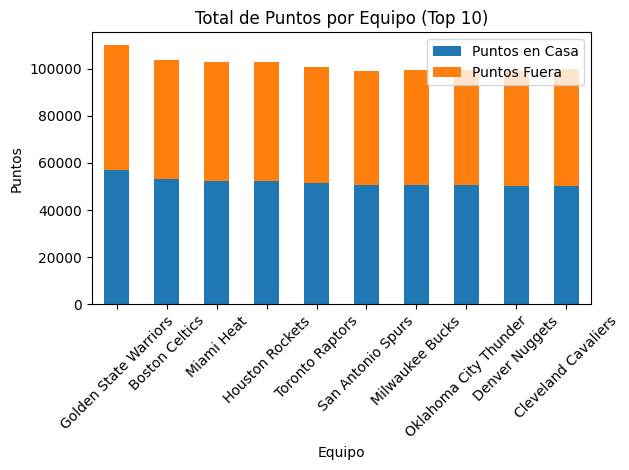

In [82]:
# Agrupación por equipo y suma de puntos en casa y fuera
# Total de puntos anotados por cada equipo en casa y fuera
points_by_team = game_data.groupby('team_name_home')[['pts_home', 'pts_away']].sum()
points_by_team = points_by_team.sort_values(by='pts_home', ascending=False).head(10)

plt.figure(figsize=(10, 6))
points_by_team.plot(kind='bar', stacked=True)
plt.title('Total de Puntos por Equipo (Top 10)')
plt.xlabel('Equipo')
plt.ylabel('Puntos')
plt.xticks(rotation=45)
plt.legend(['Puntos en Casa', 'Puntos Fuera'])
plt.tight_layout()
plt.show()

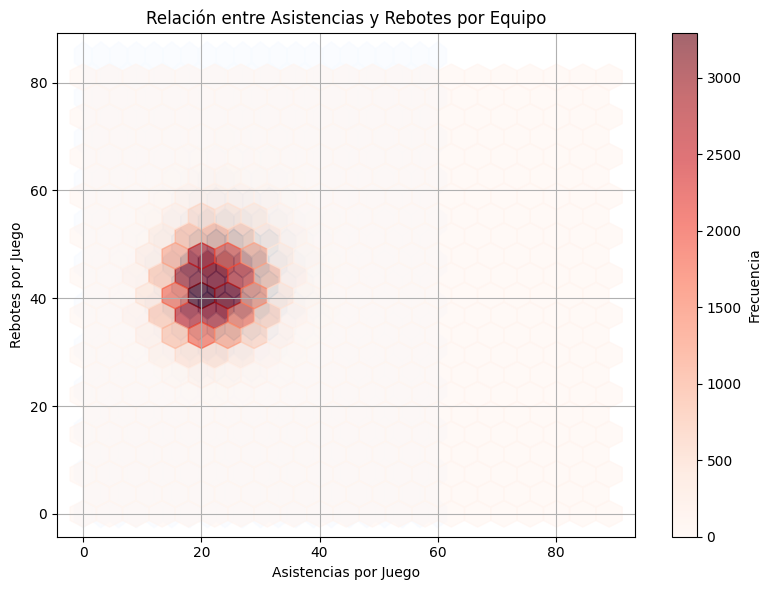

In [161]:
# Relación entre Asistencias y Rebotes por Equipo
plt.figure(figsize=(8, 6))
plt.hexbin(game_data['ast_home'], game_data['reb_home'], gridsize=20, cmap='Blues', alpha=0.6)
plt.hexbin(game_data['ast_away'], game_data['reb_away'], gridsize=20, cmap='Reds', alpha=0.6)
plt.colorbar(label='Frecuencia')
plt.title('Relación entre Asistencias y Rebotes por Equipo')
plt.xlabel('Asistencias por Juego')
plt.ylabel('Rebotes por Juego')
plt.grid(True)
plt.tight_layout()
plt.show()


### Análisis del Gráfico

1. **Título del Gráfico**: "Relación entre Asistencias y Rebotes por Equipo"
   - Este título indica que el gráfico muestra la relación entre la cantidad de asistencias y rebotes por partido de diferentes equipos.

2. **Ejes**:
   - **Eje X**: "Asistencias por Juego"
     - Representa la cantidad de asistencias por partido.
   - **Eje Y**: "Rebotes por Juego"
     - Representa la cantidad de rebotes por partido.

3. **Tipo de Gráfico**:
   - Es un gráfico de tipo "hexbin" (hexágonos binarios), que se utiliza para visualizar la densidad de puntos en una gráfica de dispersión. En este caso, cada hexágono representa una región con un número determinado de puntos (partidos con un cierto número de asistencias y rebotes).

4. **Colores**:
   - El gráfico utiliza un mapa de colores ("cmap") con tonos que van de azul a rojo.
   - Los colores más oscuros indican una mayor densidad de puntos, es decir, un mayor número de partidos que caen dentro de ese rango específico de asistencias y rebotes.

5. **Frecuencia**:
   - A la derecha del gráfico hay una barra de color que indica la "Frecuencia". Esto muestra cuántos partidos tienen un cierto número de asistencias y rebotes. Los colores más oscuros (hacia el rojo) indican una mayor frecuencia de partidos en esa región del gráfico.

6. **Observaciones**:
   - La mayoría de los puntos se concentran en la parte baja izquierda del gráfico, lo que sugiere que la mayoría de los equipos tienen entre 0 y 30 asistencias por partido y entre 0 y 60 rebotes por partido.
   - Hay una densidad notablemente alta en la región donde los equipos promedian alrededor de 10-20 asistencias y 30-50 rebotes por partido, lo cual se indica por los hexágonos más oscuros.

### Conclusiones

- La mayoría de los equipos en el análisis tienden a tener un rendimiento similar en términos de asistencias y rebotes por partido.
- Hay una correlación visible entre un rango específico de asistencias y rebotes, lo que podría ser útil para identificar patrones o tendencias en el rendimiento de los equipos.
- La densidad de puntos en ciertas áreas del gráfico puede ayudar a enfocar el análisis en esos rangos específicos de asistencias y rebotes para un estudio más detallado.

Este tipo de gráfico es útil para entender cómo se distribuyen las asistencias y rebotes por partido en una liga o entre equipos específicos, y puede servir como base para análisis más profundos de desempeño y estrategia.


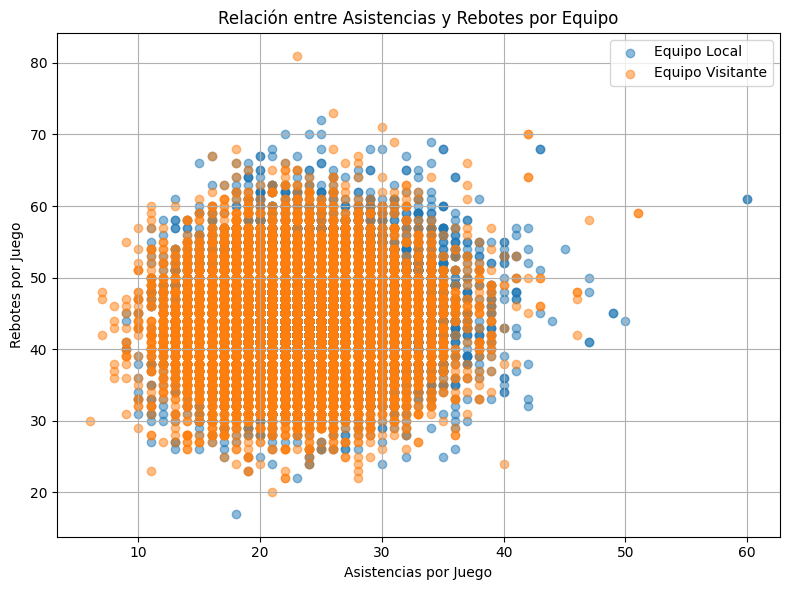

In [83]:
# Relación entre Asistencias y Rebotes por Equipo
plt.figure(figsize=(8, 6))
plt.scatter(game_data['ast_home'], game_data['reb_home'], alpha=0.5, label='Equipo Local')
plt.scatter(game_data['ast_away'], game_data['reb_away'], alpha=0.5, label='Equipo Visitante')
plt.title('Relación entre Asistencias y Rebotes por Equipo')
plt.xlabel('Asistencias por Juego')
plt.ylabel('Rebotes por Juego')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\Personal Computer\AppData\Local\Temp\ipykernel_12884\3019741557.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  game_data_este['game_date'] = pd.to_datetime(game_data_este['game_date'])
C:\Users\Personal Computer\AppData\Local\Temp\ipykernel_12884\3019741557.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  game_data_oeste['game_date'] = pd.to_datetime(game_data_oeste['game_date'])
C:\Users\Personal Computer\AppData\Local\Temp\ipykernel_12884\3019741557.py:11: SettingWithCopyWarning: 
A value

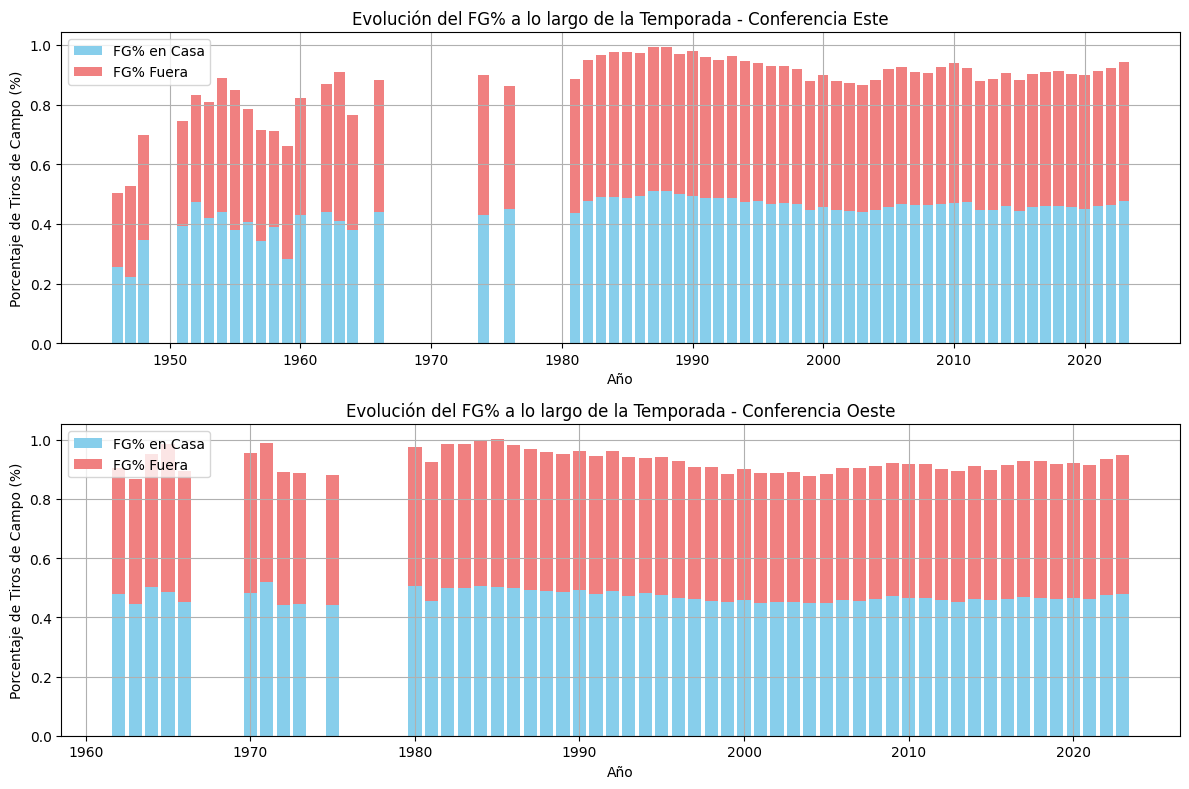

In [158]:
# Evolución del FG% a lo largo de la Temporada 
# Filtrar los datos por conferencia Este y Oeste
game_data_este = game_data[(game_data['team_name_home'].isin(conferencia_este)) | (game_data['team_name_away'].isin(conferencia_este))]
game_data_oeste = game_data[(game_data['team_name_home'].isin(conferencia_oeste)) | (game_data['team_name_away'].isin(conferencia_oeste))]

# Convertir la columna game_date a tipo datetime para poder trabajar con años
game_data_este['game_date'] = pd.to_datetime(game_data_este['game_date'])
game_data_oeste['game_date'] = pd.to_datetime(game_data_oeste['game_date'])

# Extraer el año de la fecha del juego
game_data_este['year'] = game_data_este['game_date'].dt.year
game_data_oeste['year'] = game_data_oeste['game_date'].dt.year

# Calcular el promedio del porcentaje de tiros de campo por año para cada conferencia
fg_pct_over_time_este = game_data_este.groupby(['year'])[['fg_pct_home', 'fg_pct_away']].mean().reset_index()
fg_pct_over_time_oeste = game_data_oeste.groupby(['year'])[['fg_pct_home', 'fg_pct_away']].mean().reset_index()

# Crear gráficos de barras apiladas por conferencia y año
plt.figure(figsize=(12, 8))

# Gráfico para la conferencia Este
plt.subplot(2, 1, 1)
plt.bar(fg_pct_over_time_este['year'], fg_pct_over_time_este['fg_pct_home'], label='FG% en Casa', color='skyblue')
plt.bar(fg_pct_over_time_este['year'], fg_pct_over_time_este['fg_pct_away'], bottom=fg_pct_over_time_este['fg_pct_home'], label='FG% Fuera', color='lightcoral')
plt.title('Evolución del FG% a lo largo de la Temporada - Conferencia Este')
plt.xlabel('Año')
plt.ylabel('Porcentaje de Tiros de Campo (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Gráfico para la conferencia Oeste
plt.subplot(2, 1, 2)
plt.bar(fg_pct_over_time_oeste['year'], fg_pct_over_time_oeste['fg_pct_home'], label='FG% en Casa', color='skyblue')
plt.bar(fg_pct_over_time_oeste['year'], fg_pct_over_time_oeste['fg_pct_away'], bottom=fg_pct_over_time_oeste['fg_pct_home'], label='FG% Fuera', color='lightcoral')
plt.title('Evolución del FG% a lo largo de la Temporada - Conferencia Oeste')
plt.xlabel('Año')
plt.ylabel('Porcentaje de Tiros de Campo (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Mostrar los gráficos
plt.show()



C:\Users\Personal Computer\AppData\Local\Temp\ipykernel_12884\1727937968.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')  # Ajuste adicional de rotación y alineación
C:\Users\Personal Computer\AppData\Local\Temp\ipykernel_12884\1727937968.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')  # Ajuste adicional de rotación y alineación


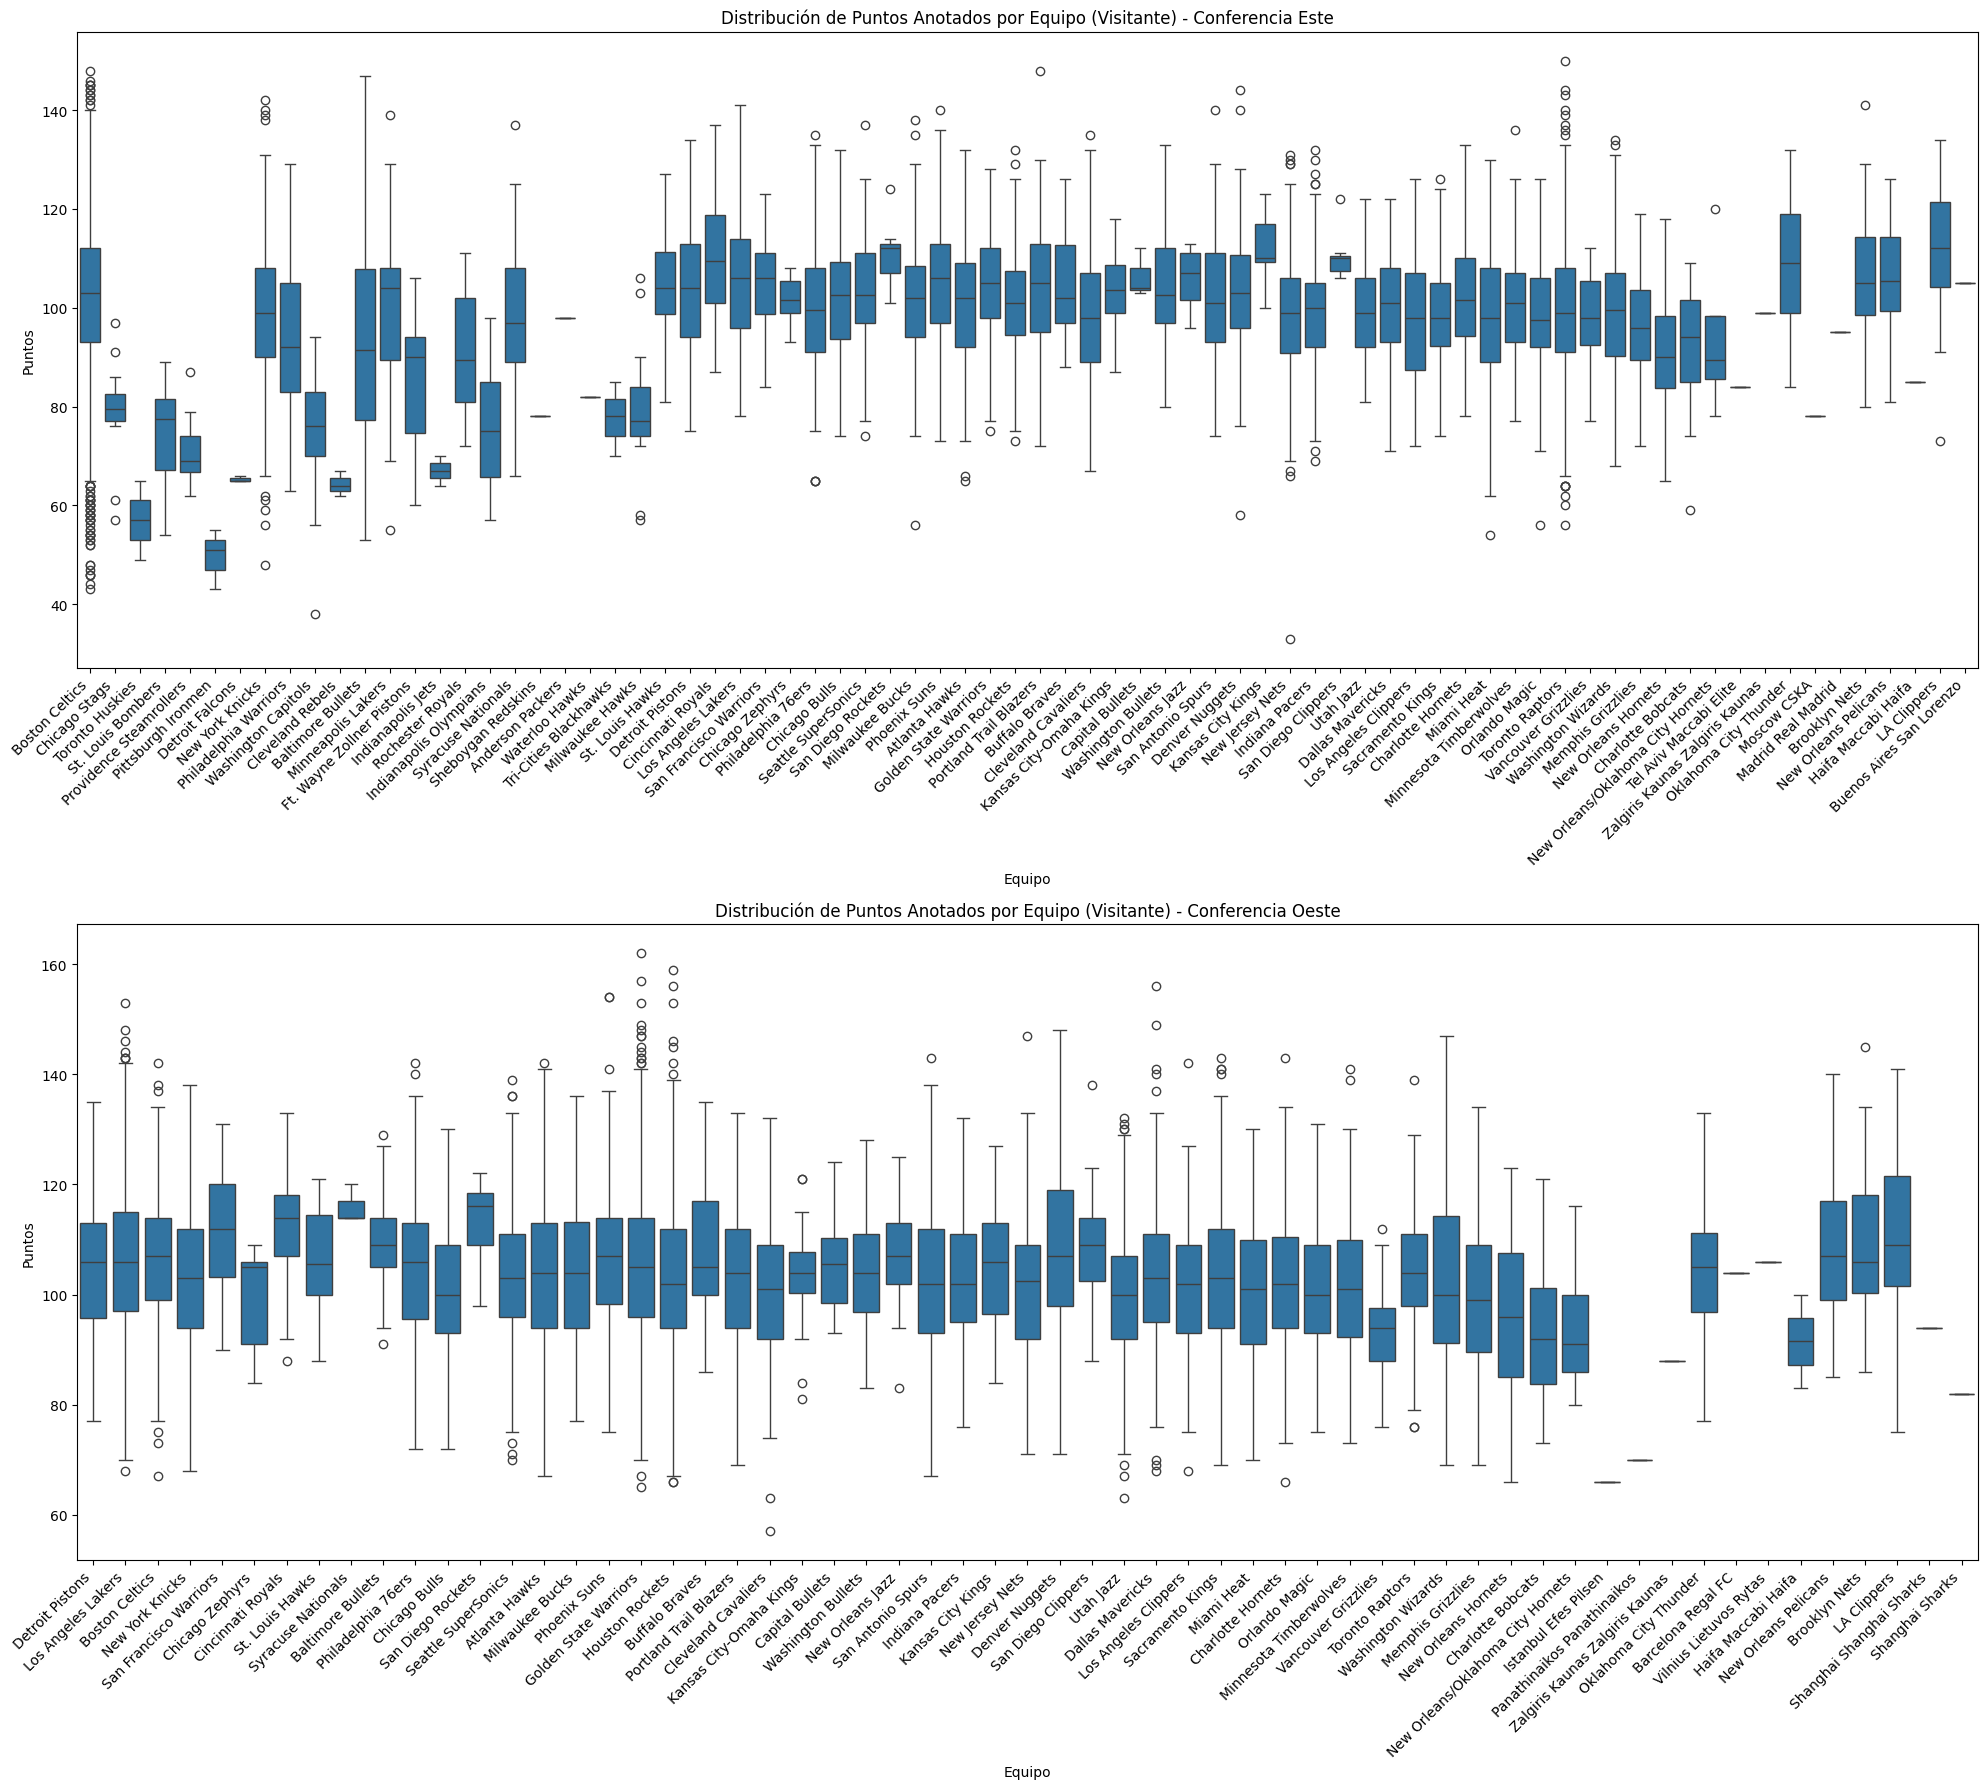

In [152]:
# Distribución de Puntos Anotados por Equipo (Visitante) - por Conferencias
# Filtramos los datos por conferencia Este y Oeste
game_data_este = game_data[(game_data['team_name_home'].isin(conferencia_este)) | (game_data['team_name_away'].isin(conferencia_este))]
game_data_oeste = game_data[(game_data['team_name_home'].isin(conferencia_oeste)) | (game_data['team_name_away'].isin(conferencia_oeste))]

# Creamos la figura y los subplots con un tamaño más grande
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 18))

# Gráfico de caja para conferencia Este
sns.boxplot(x='team_name_away', y='pts_away', data=game_data_este, ax=ax1)
ax1.set_title('Distribución de Puntos Anotados por Equipo (Visitante) - Conferencia Este')
ax1.set_xlabel('Equipo')
ax1.set_ylabel('Puntos')
ax1.tick_params(axis='x', rotation=45)  # Rotación de etiquetas
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')  # Ajuste adicional de rotación y alineación

# Gráfico de caja para conferencia Oeste
sns.boxplot(x='team_name_away', y='pts_away', data=game_data_oeste, ax=ax2)
ax2.set_title('Distribución de Puntos Anotados por Equipo (Visitante) - Conferencia Oeste')
ax2.set_xlabel('Equipo')
ax2.set_ylabel('Puntos')
ax2.tick_params(axis='x', rotation=45)  # Rotación de etiquetas
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')  # Ajuste adicional de rotación y alineación

# Ajustamos el espaciado entre los subplots
plt.tight_layout()

# Mostramos los gráficos
plt.show()


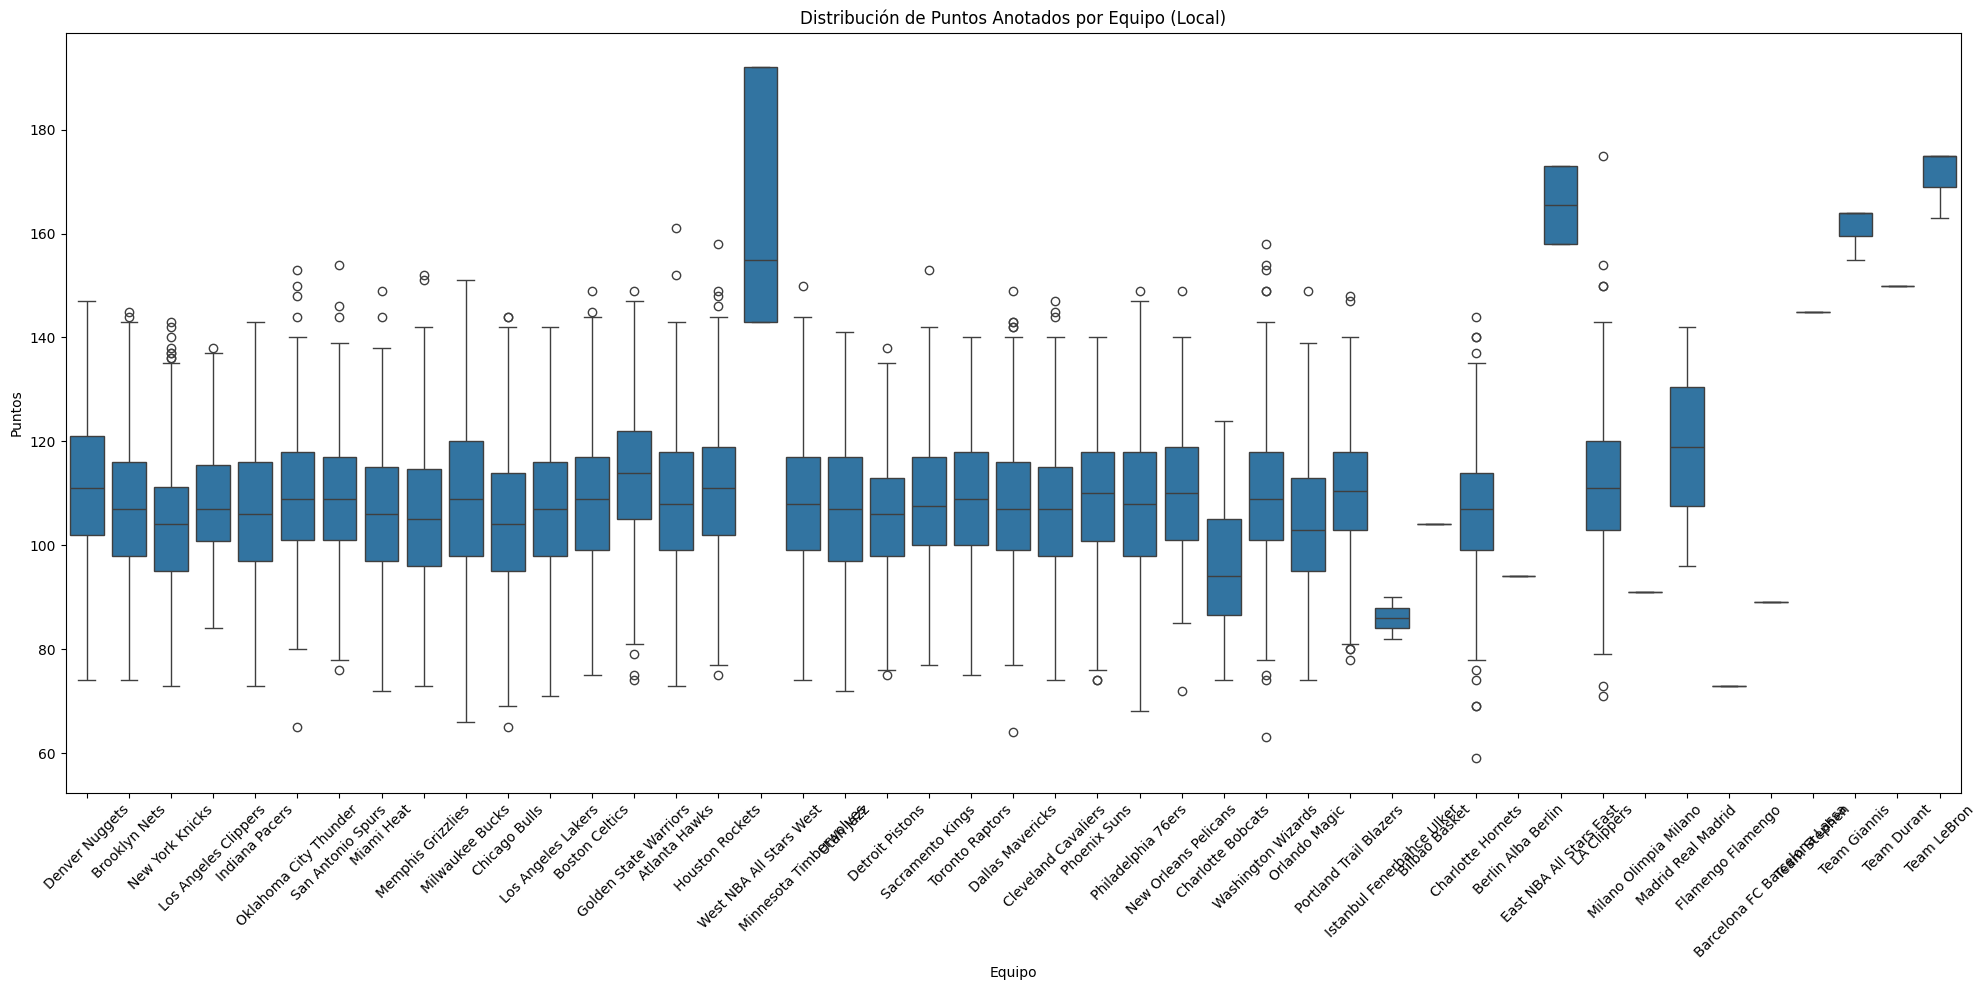

In [85]:
# Distribución de Puntos Anotados por Equipo (Local)
plt.figure(figsize=(20, 10))
sns.boxplot(x='team_name_home', y='pts_home', data=game_data)
plt.title('Distribución de Puntos Anotados por Equipo (Local)')
plt.xlabel('Equipo')
plt.ylabel('Puntos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Verificar los nombres de columnas en points_by_team_conference_over_time
print(points_by_team_conference_over_time.columns)

# Verificar qué equipos de las listas no están presentes en points_by_team_conference_over_time
equipos_faltantes_este = [equipo for equipo in conferencia_este if equipo not in points_by_team_conference_over_time.columns]
equipos_faltantes_oeste = [equipo for equipo in conferencia_oeste if equipo not in points_by_team_conference_over_time.columns]

print("Equipos faltantes en la conferencia Este:", equipos_faltantes_este)
print("Equipos faltantes en la conferencia Oeste:", equipos_faltantes_oeste)


Index(['Boston Celtics', 'Brooklyn Nets', 'New York Knicks',
       'Philadelphia 76ers', 'Toronto Raptors', 'Chicago Bulls',
       'Cleveland Cavaliers', 'Detroit Pistons', 'Indiana Pacers',
       'Milwaukee Bucks', 'Atlanta Hawks', 'Charlotte Hornets', 'Miami Heat',
       'Orlando Magic', 'Washington Wizards', 'Dallas Mavericks',
       'Houston Rockets', 'Memphis Grizzlies', 'New Orleans Pelicans',
       'San Antonio Spurs', 'Denver Nuggets', 'Minnesota Timberwolves',
       'Oklahoma City Thunder', 'Portland Trail Blazers', 'Utah Jazz',
       'Golden State Warriors', 'Los Angeles Clippers', 'Los Angeles Lakers',
       'Phoenix Suns', 'Sacramento Kings'],
      dtype='object', name='team_name_home')
Equipos faltantes en la conferencia Este: []
Equipos faltantes en la conferencia Oeste: []


Distribución de las asistencias por conferencia

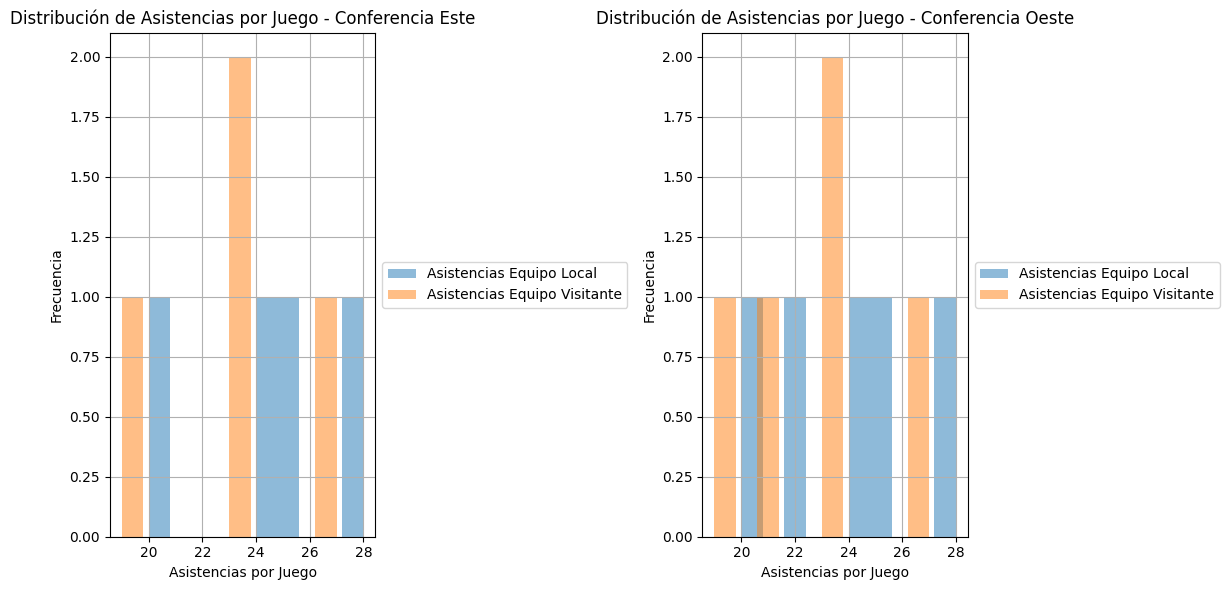

In [145]:
# Filtramos los datos por conferencia Este y Oeste
game_data_este = game_data[(game_data['team_name_home'].isin(conferencia_este)) | (game_data['team_name_away'].isin(conferencia_este))]
game_data_oeste = game_data[(game_data['team_name_home'].isin(conferencia_oeste)) | (game_data['team_name_away'].isin(conferencia_oeste))]

# Creamos el gráfico de distribución de las asistencias por conferencia
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(game_data_este['ast_home'], bins=10, alpha=0.5, label='Asistencias Equipo Local')
plt.hist(game_data_este['ast_away'], bins=10, alpha=0.5, label='Asistencias Equipo Visitante')
plt.title('Distribución de Asistencias por Juego - Conferencia Este')
plt.xlabel('Asistencias por Juego')
plt.ylabel('Frecuencia')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Coloca la leyenda a la derecha del gráfico
plt.grid(True)

plt.subplot(1, 2, 2)
plt.hist(game_data_oeste['ast_home'], bins=10, alpha=0.5, label='Asistencias Equipo Local')
plt.hist(game_data_oeste['ast_away'], bins=10, alpha=0.5, label='Asistencias Equipo Visitante')
plt.title('Distribución de Asistencias por Juego - Conferencia Oeste')
plt.xlabel('Asistencias por Juego')
plt.ylabel('Frecuencia')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Coloca la leyenda a la derecha del gráfico
plt.grid(True)

plt.tight_layout()
plt.show()


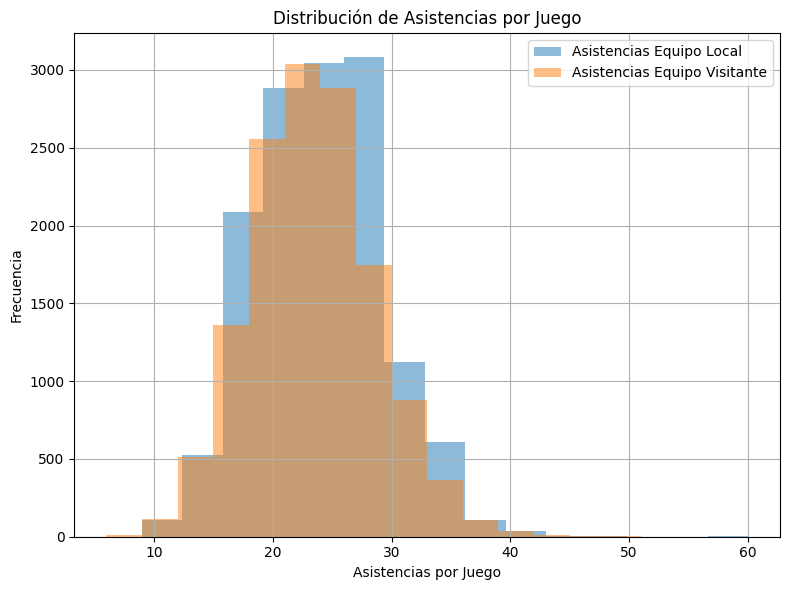

In [86]:
# Distribución de Asistencias por Juego
plt.figure(figsize=(8, 6))
plt.hist(game_data['ast_home'], bins=15, alpha=0.5, label='Asistencias Equipo Local')
plt.hist(game_data['ast_away'], bins=15, alpha=0.5, label='Asistencias Equipo Visitante')
plt.title('Distribución de Asistencias por Juego')
plt.xlabel('Asistencias por Juego')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Matriz de Correlación 

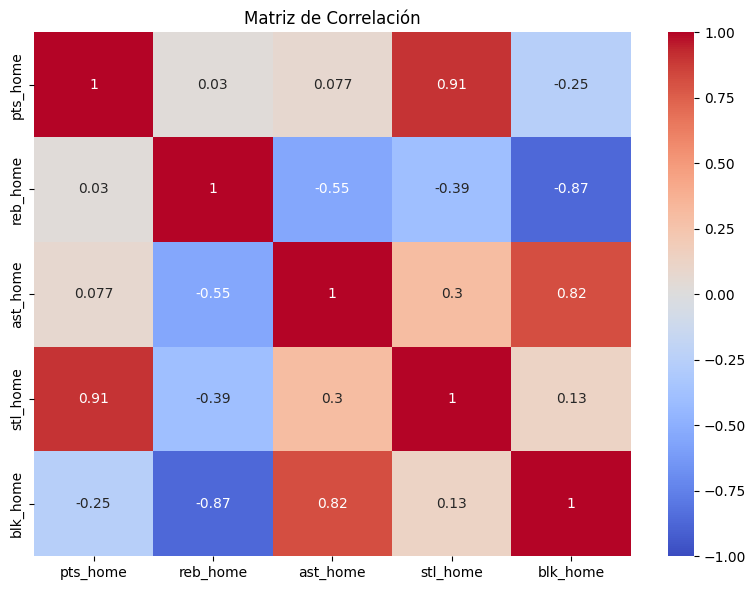

In [123]:
# Matriz de Correlación
correlation_matrix = game_data[['pts_home', 'reb_home', 'ast_home', 'stl_home', 'blk_home']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación')
plt.tight_layout()
plt.show()

Distribución de Puntos Anotados por Resultado en Casa

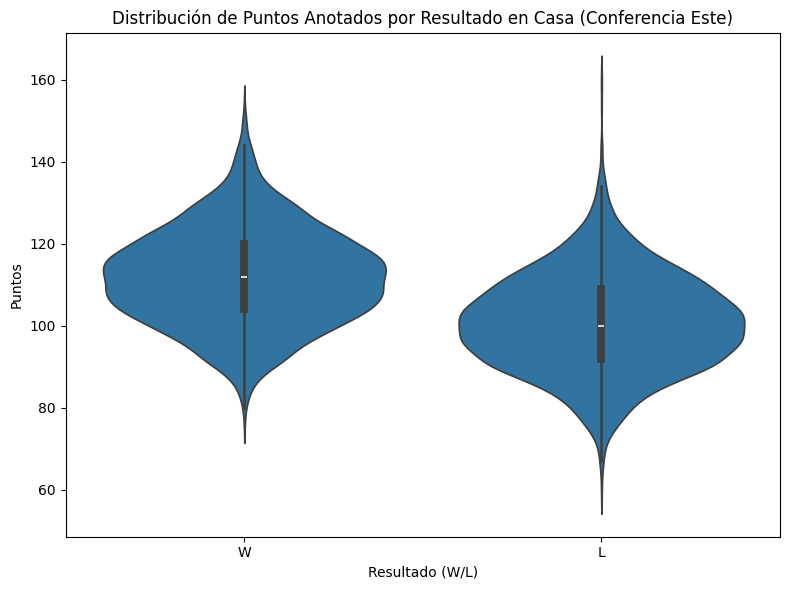

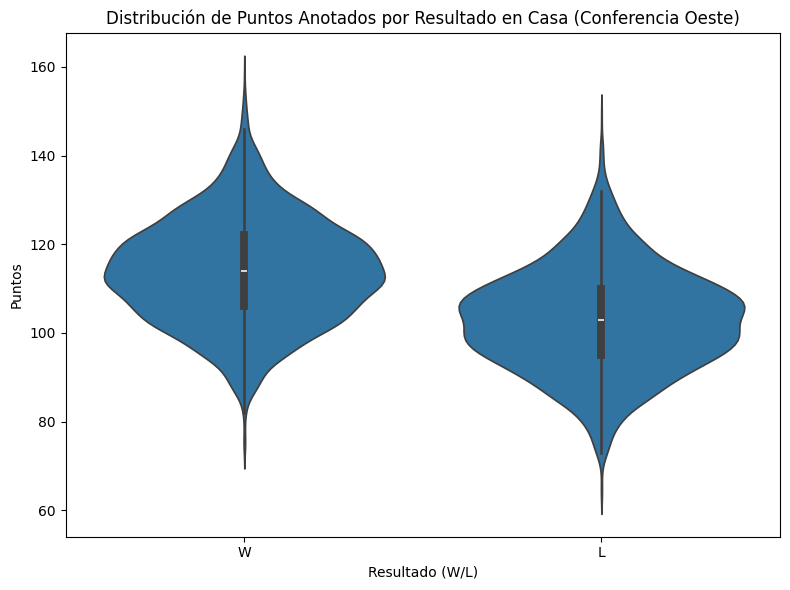

In [115]:
# Filtrar los datos por conferencia Este
game_data_este = game_data[game_data['team_name_home'].isin(conferencia_este)]
game_data_oeste = game_data[game_data['team_name_home'].isin(conferencia_oeste)]

# Gráfico de violín para la conferencia Este
plt.figure(figsize=(8, 6))
sns.violinplot(x='wl_home', y='pts_home', data=game_data_este)
plt.title('Distribución de Puntos Anotados por Resultado en Casa (Conferencia Este)')
plt.xlabel('Resultado (W/L)')
plt.ylabel('Puntos')
plt.tight_layout()
plt.show()

# Gráfico de violín para la conferencia Oeste
plt.figure(figsize=(8, 6))
sns.violinplot(x='wl_home', y='pts_home', data=game_data_oeste)
plt.title('Distribución de Puntos Anotados por Resultado en Casa (Conferencia Oeste)')
plt.xlabel('Resultado (W/L)')
plt.ylabel('Puntos')
plt.tight_layout()
plt.show()


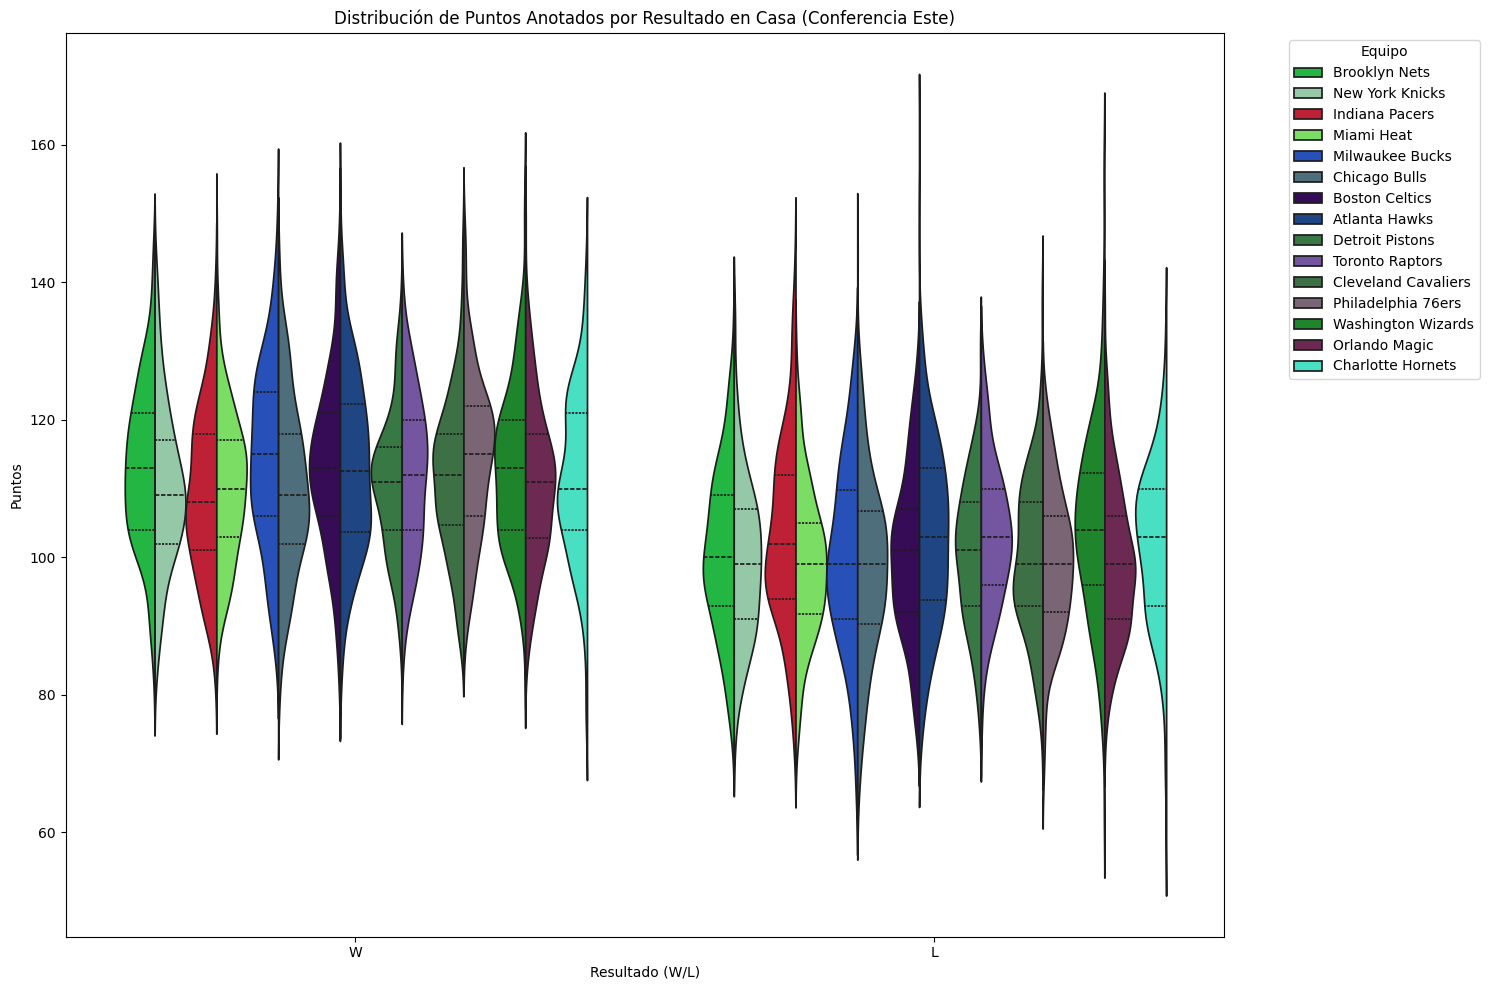

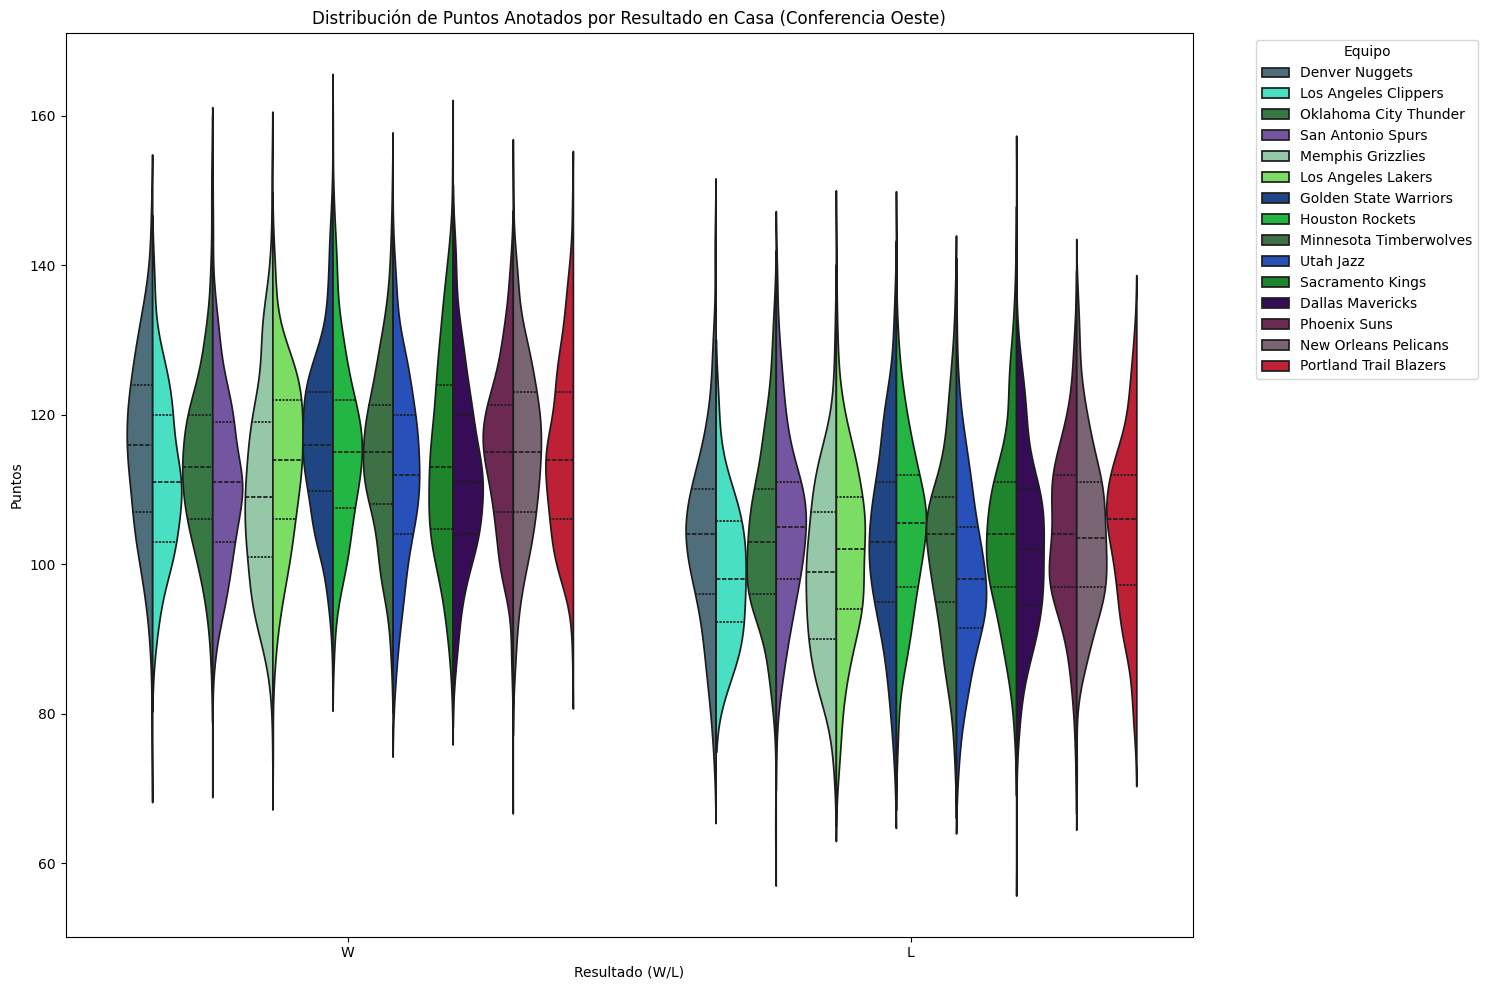

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns
import random
import pandas as pd

# Función para generar colores aleatorios para los equipos
def get_random_color_palette(teams):
    random.seed(42)  # Fijar la semilla para reproducibilidad
    colors = ["#{:06x}".format(random.randint(0, 0xFFFFFF)) for _ in range(len(teams))]
    return dict(zip(teams, colors))

# Asignar colores aleatorios a los equipos
team_colors_este = get_random_color_palette(conferencia_este)
team_colors_oeste = get_random_color_palette(conferencia_oeste)

# Filtrar datos por conferencias
game_data_este = game_data[game_data['team_name_home'].isin(conferencia_este)]
game_data_oeste = game_data[game_data['team_name_home'].isin(conferencia_oeste)]

# Asignar una paleta de colores para los resultados de los juegos
wl_palette = {'W': 'blue', 'L': 'red'}

# Función para graficar diagrama de violín con colores aleatorios por equipo y resultados de los juegos
def plot_violin_by_team_conference(data, team_colors, title):
    plt.figure(figsize=(15, 10))
    sns.violinplot(x='wl_home', y='pts_home', hue='team_name_home', data=data, split=True, inner="quart", palette=team_colors)
    plt.title(title)
    plt.xlabel('Resultado (W/L)')
    plt.ylabel('Puntos')
    plt.legend(title='Equipo', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Graficar diagrama de violín para la conferencia Este
plot_violin_by_team_conference(game_data_este, team_colors_este, 'Distribución de Puntos Anotados por Resultado en Casa (Conferencia Este)')

# Graficar diagrama de violín para la conferencia Oeste
plot_violin_by_team_conference(game_data_oeste, team_colors_oeste, 'Distribución de Puntos Anotados por Resultado en Casa (Conferencia Oeste)')



Por equipos y por conferencias

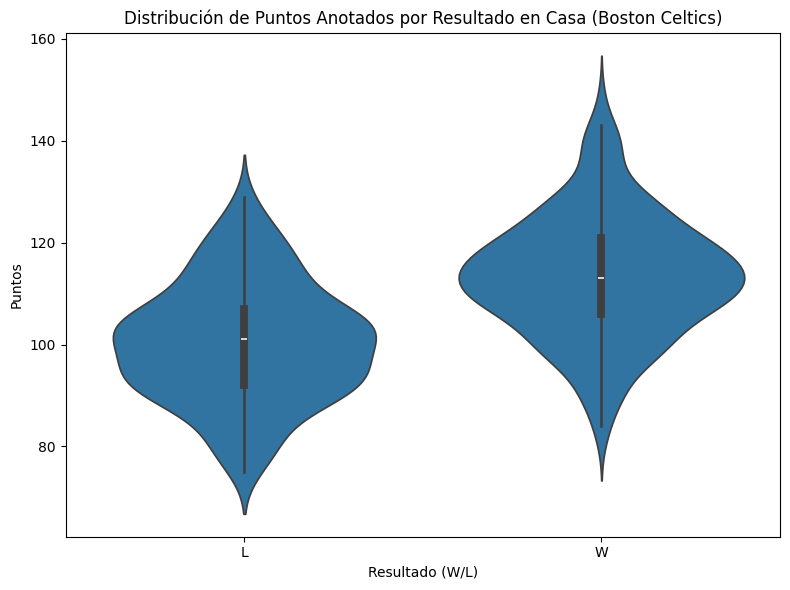

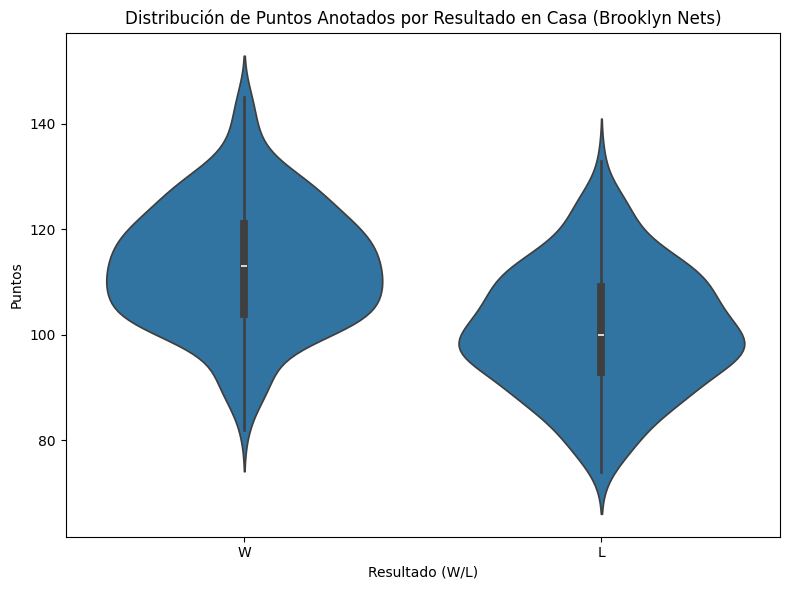

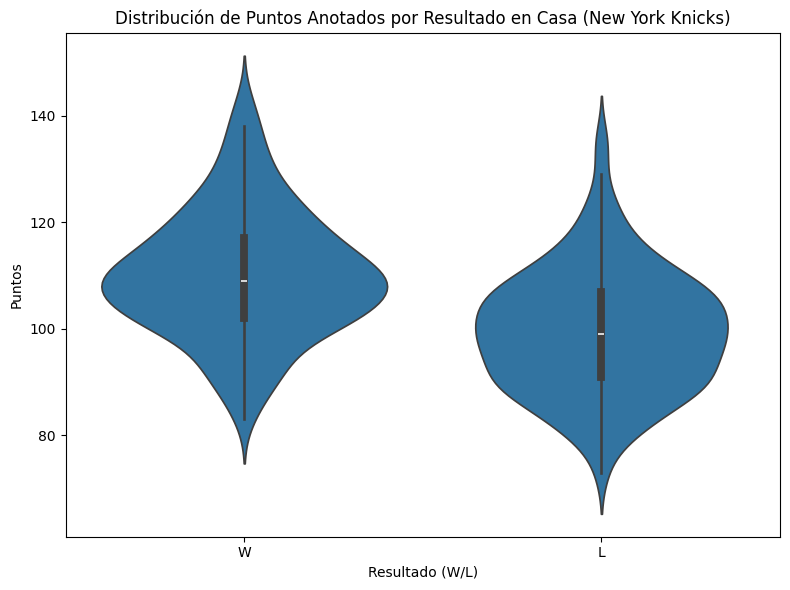

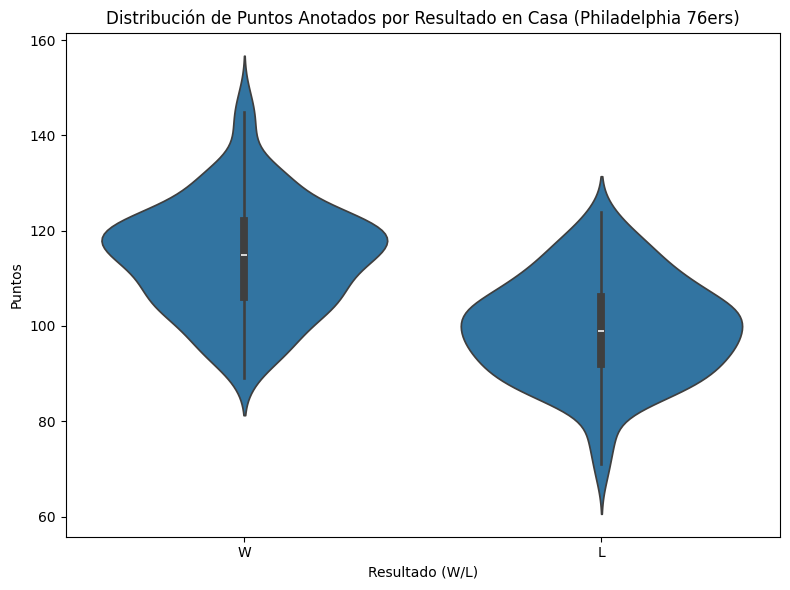

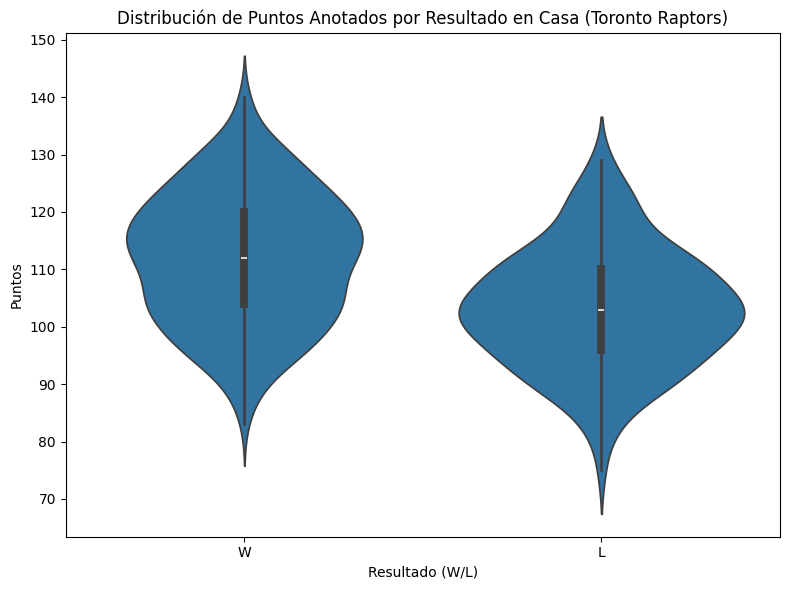

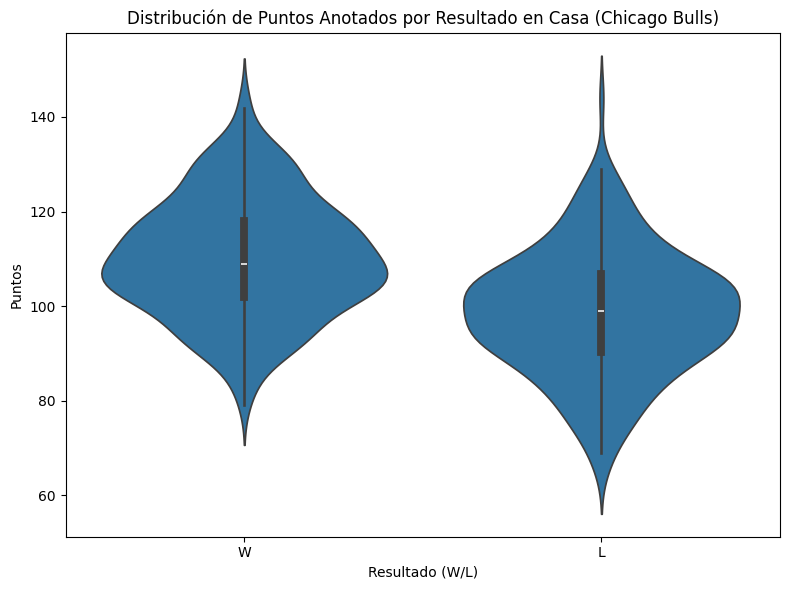

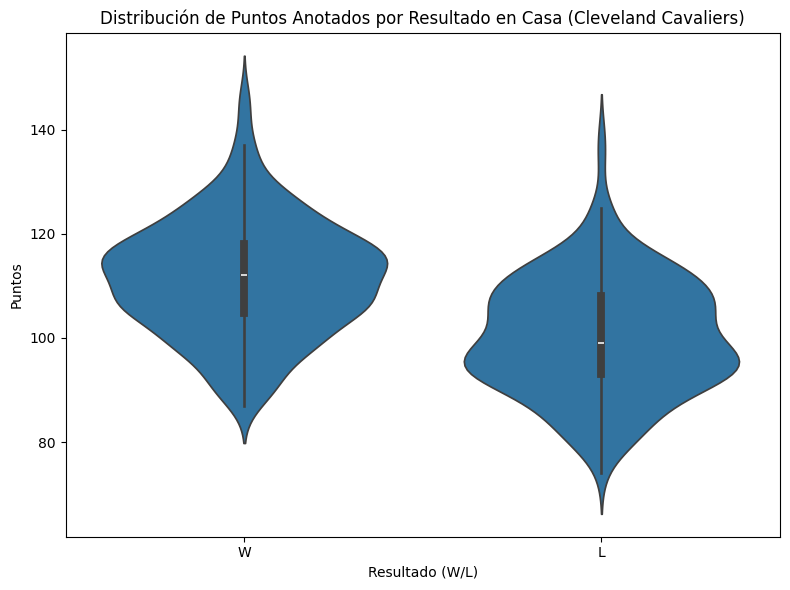

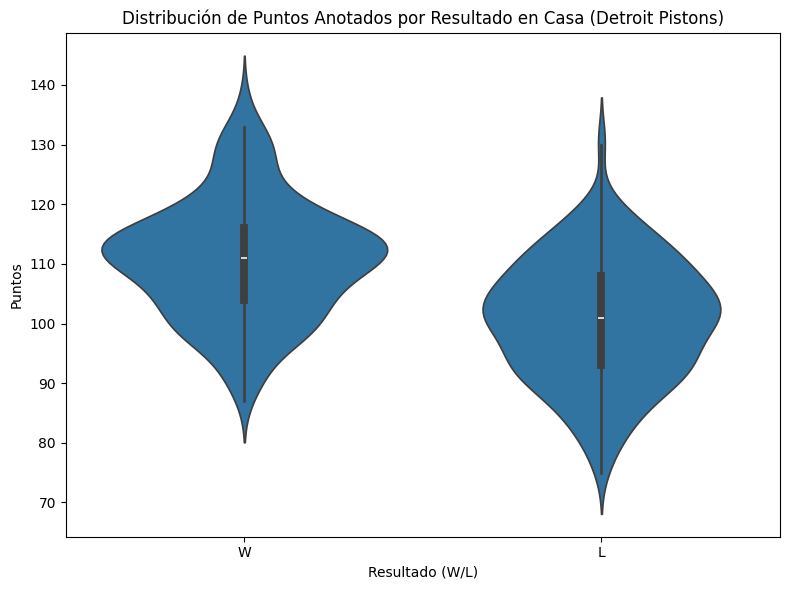

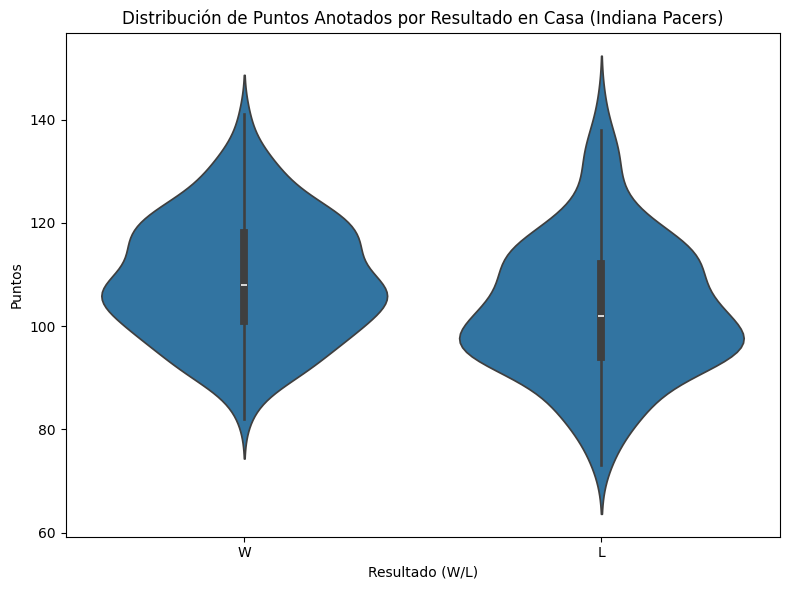

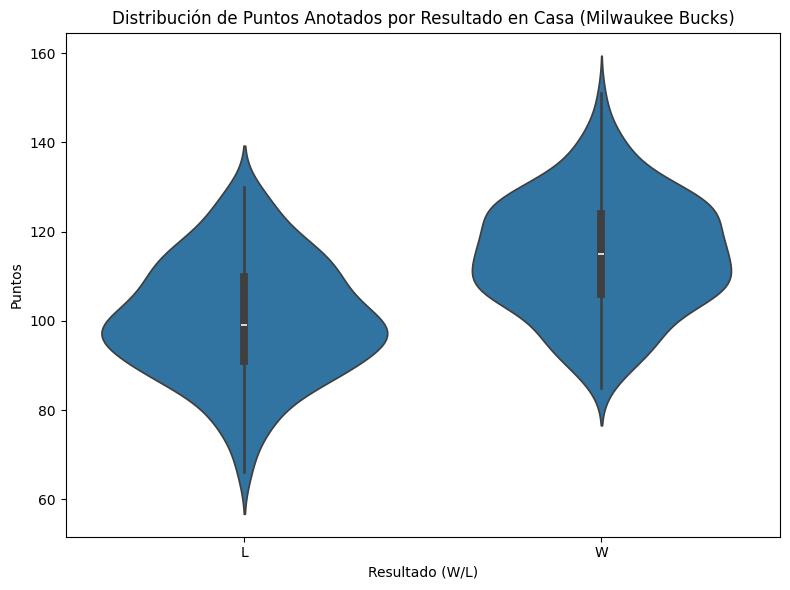

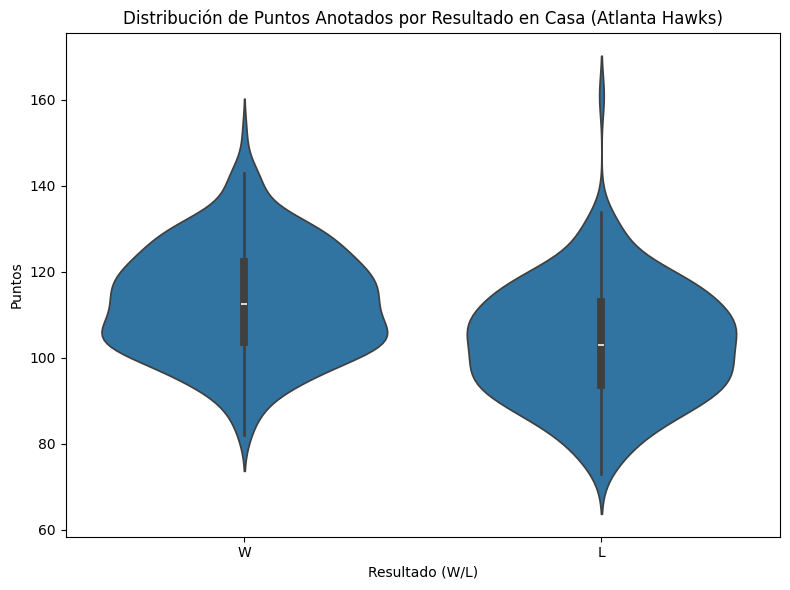

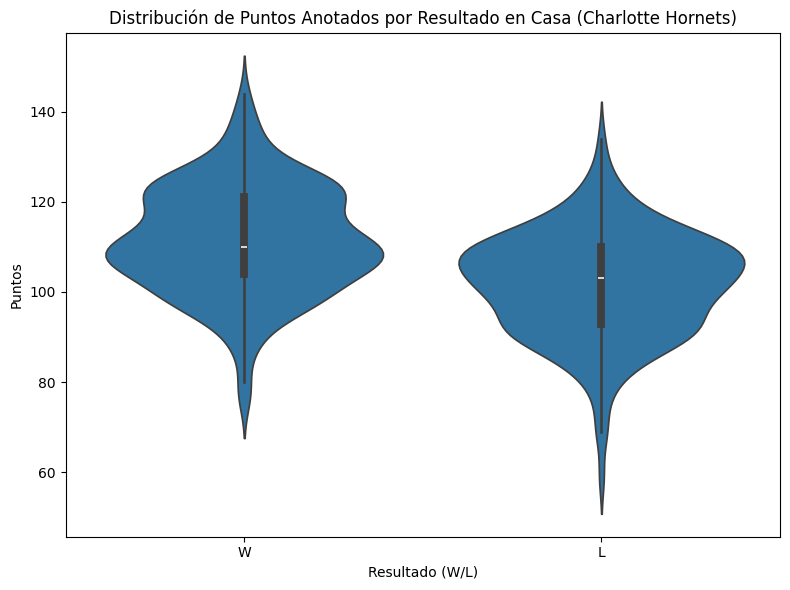

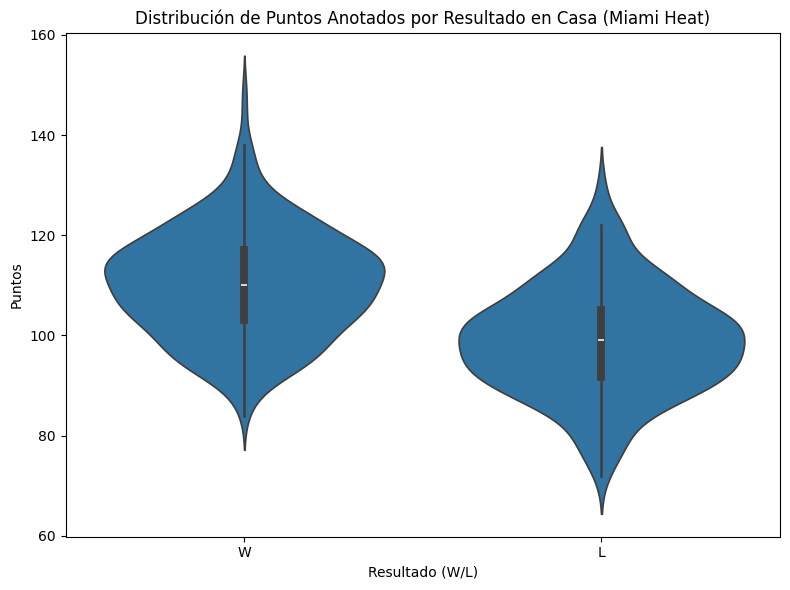

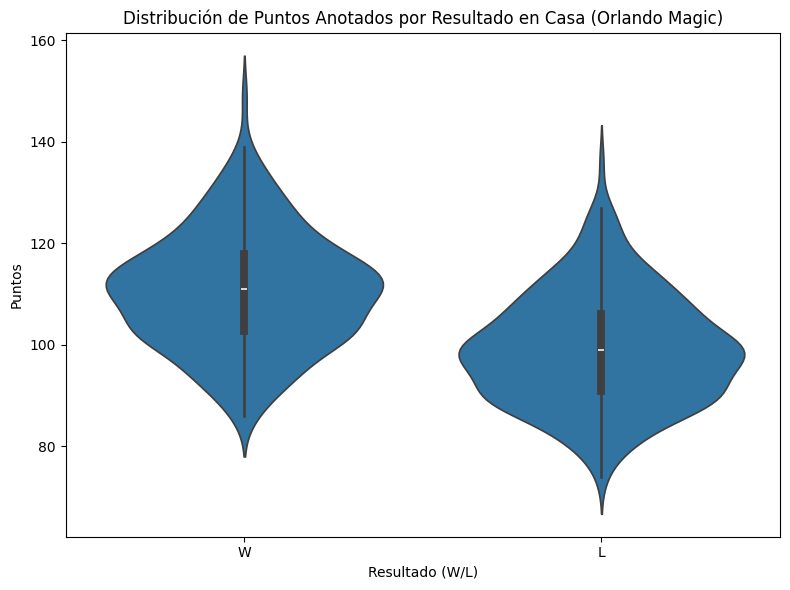

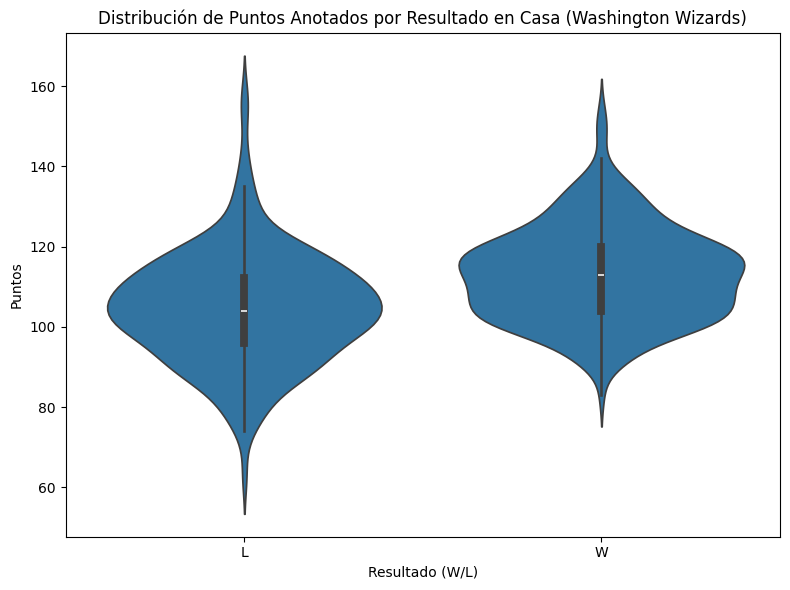

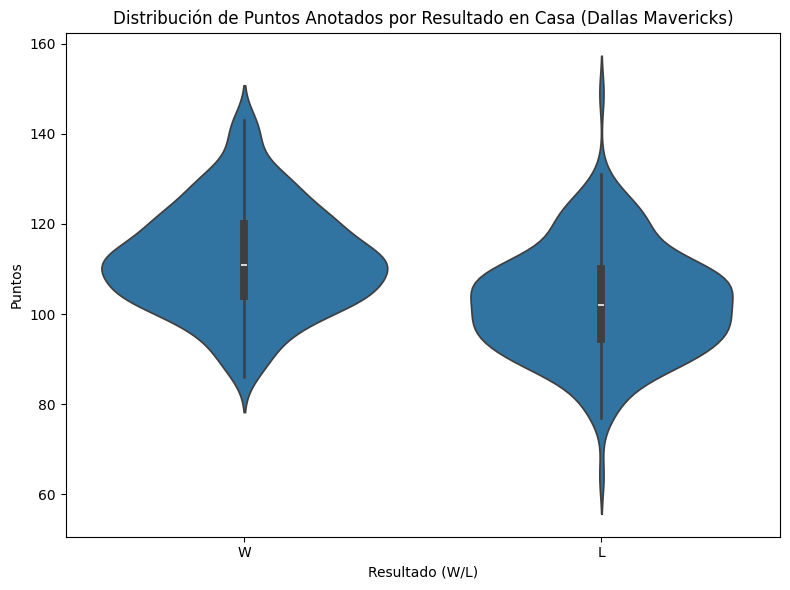

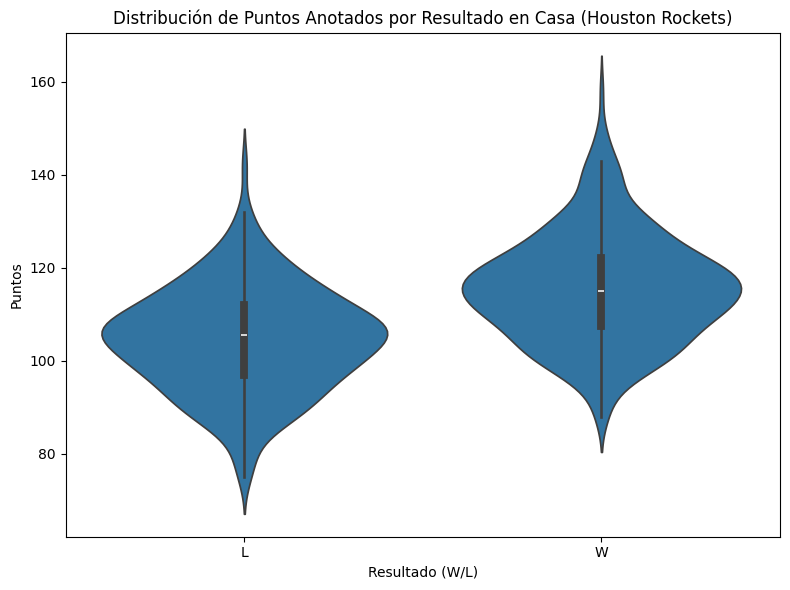

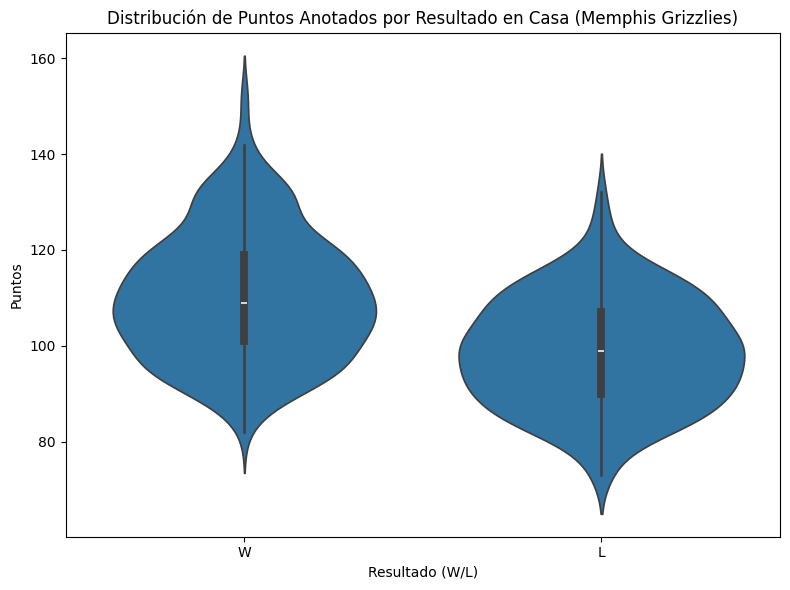

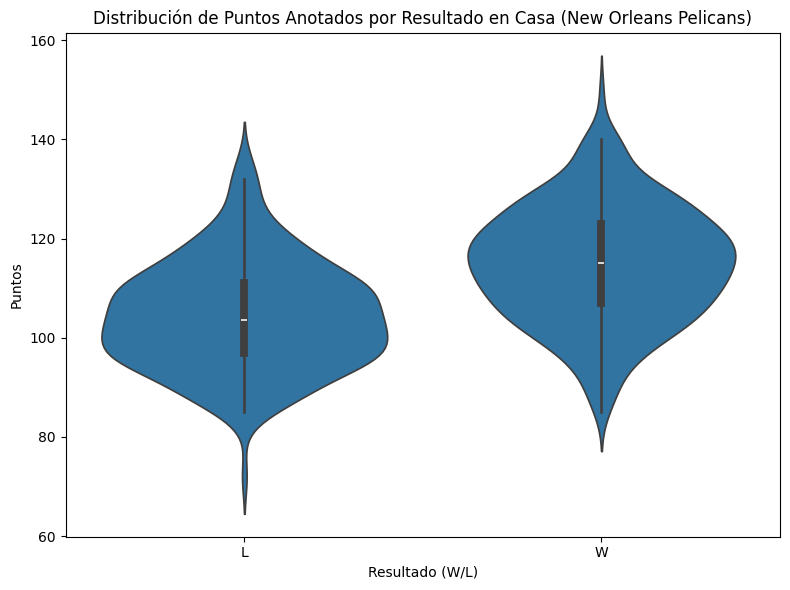

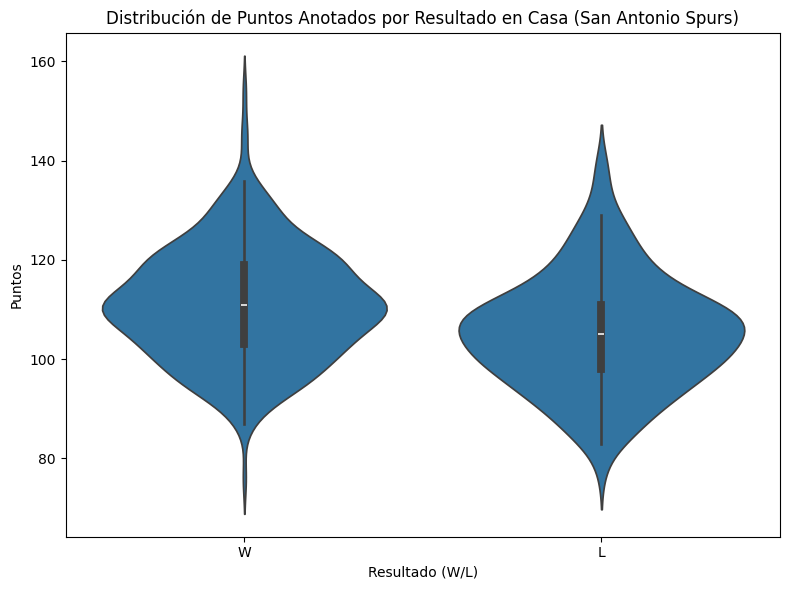

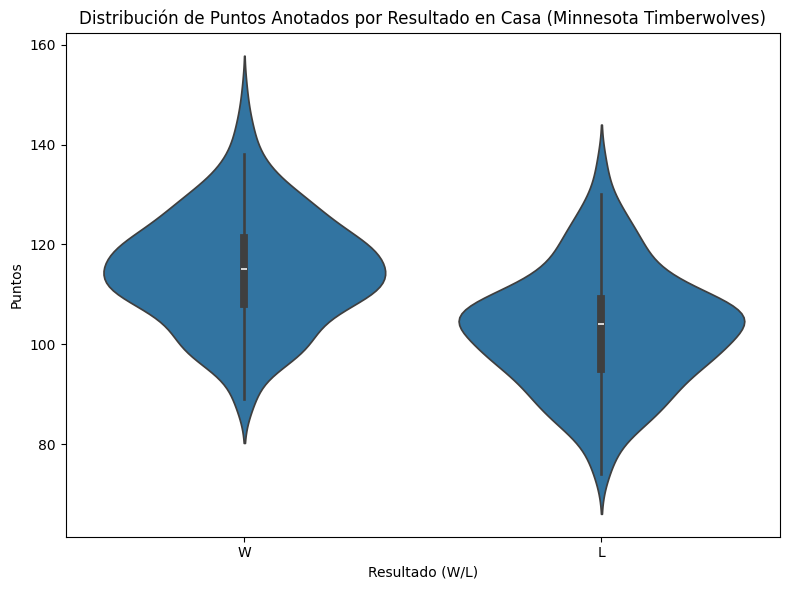

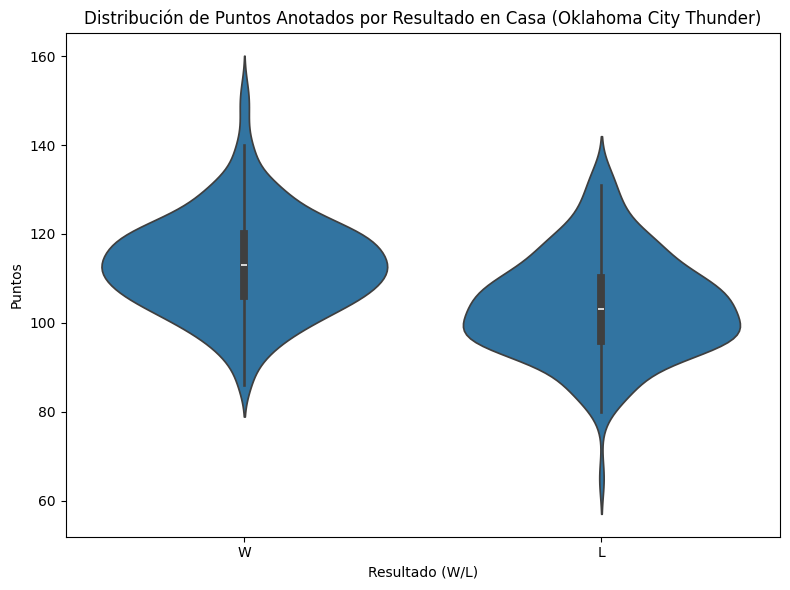

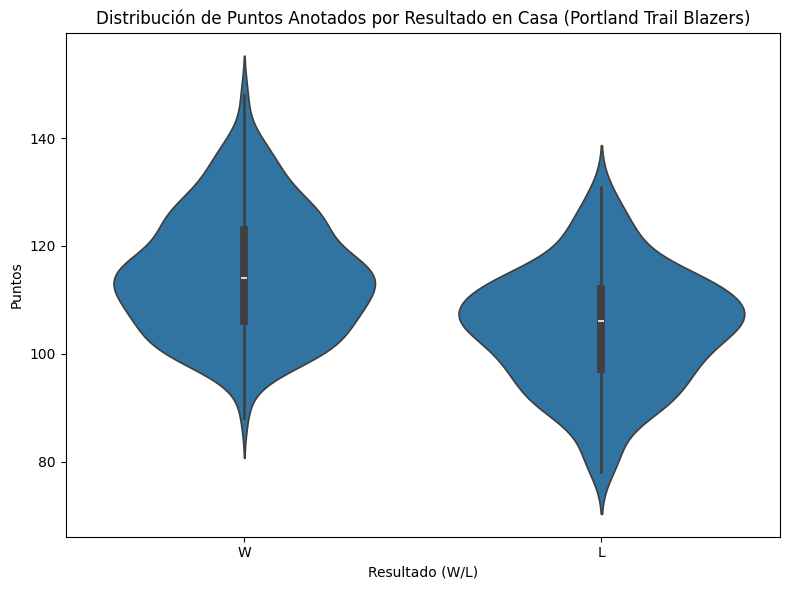

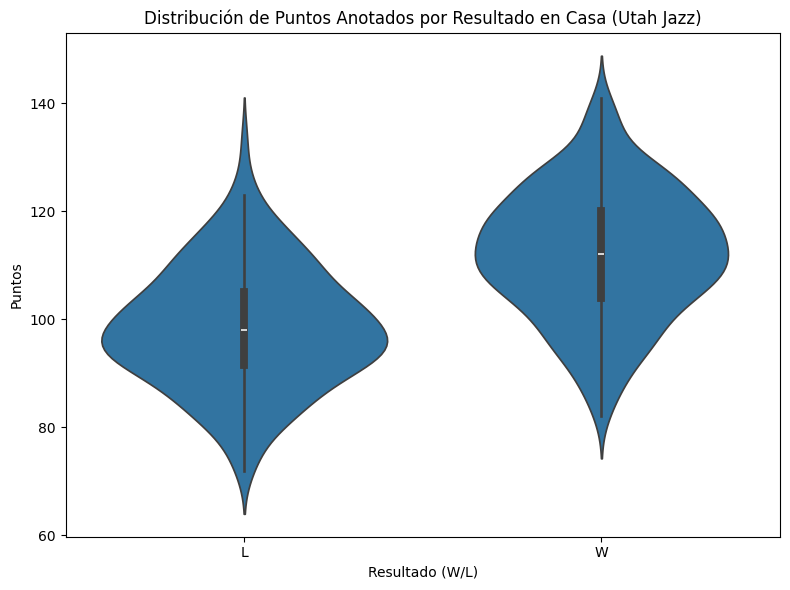

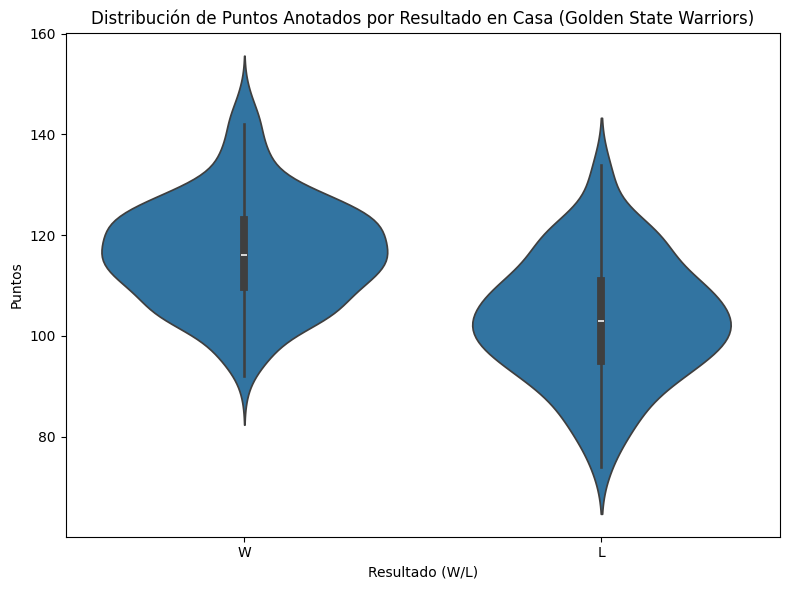

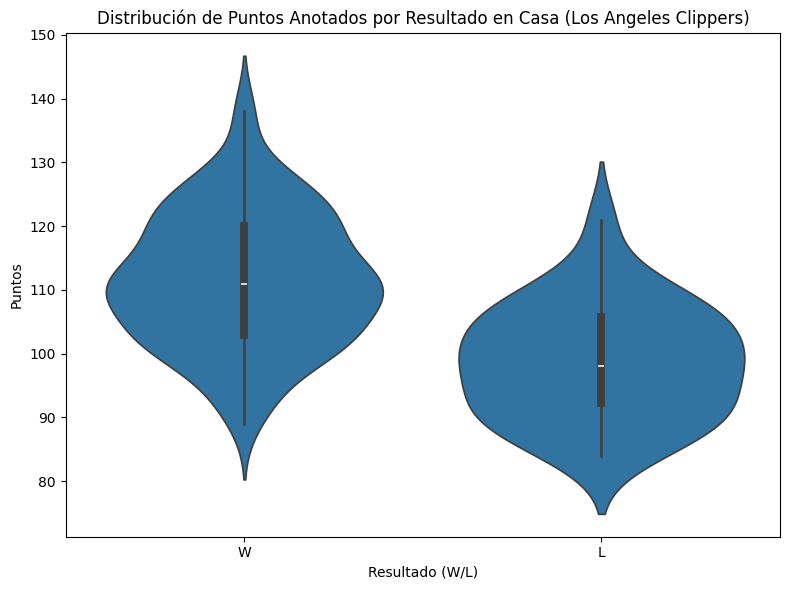

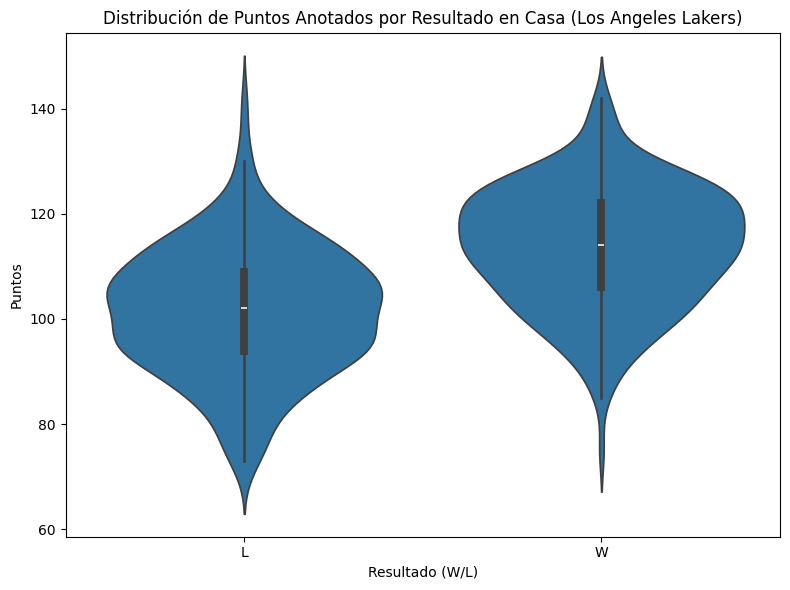

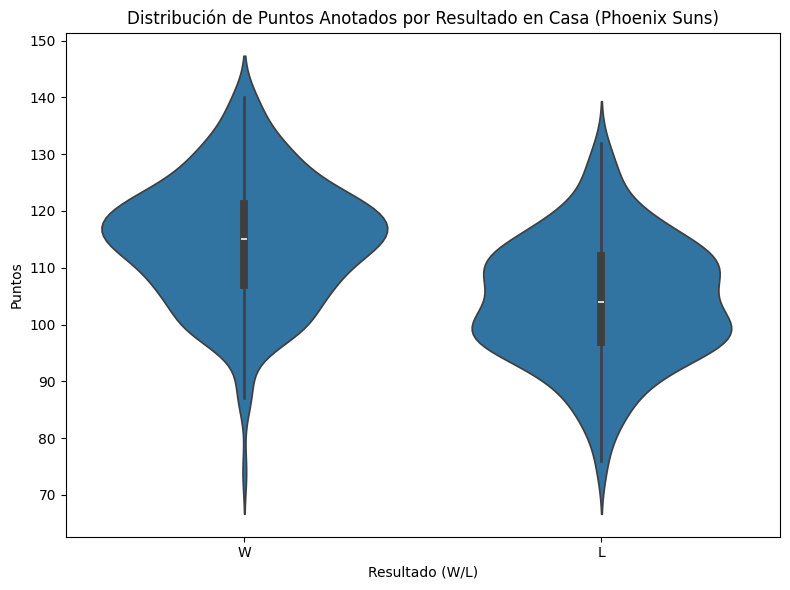

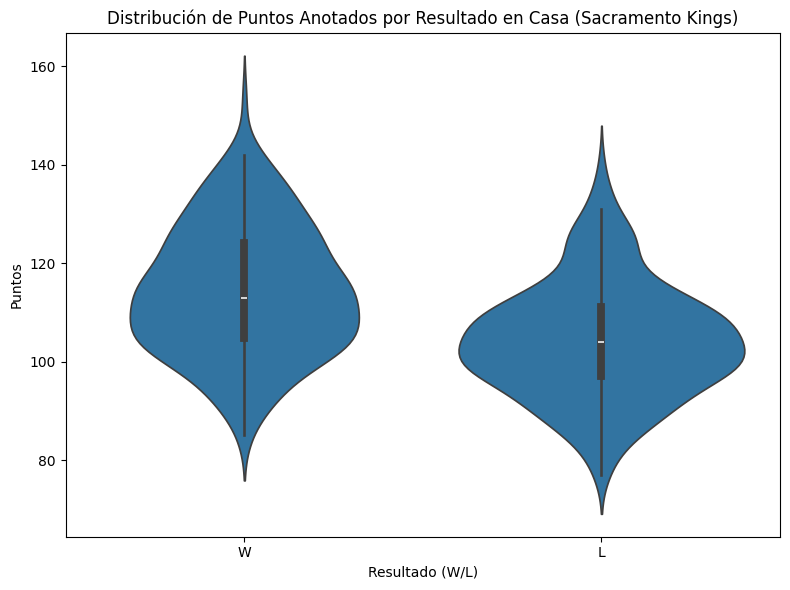

In [116]:
# Función para graficar diagrama de violín por equipo
def plot_violin_by_team(team_data, team_name):
    plt.figure(figsize=(8, 6))
    sns.violinplot(x='wl_home', y='pts_home', data=team_data)
    plt.title(f'Distribución de Puntos Anotados por Resultado en Casa ({team_name})')
    plt.xlabel('Resultado (W/L)')
    plt.ylabel('Puntos')
    plt.tight_layout()
    plt.show()

# Graficamos diagrama de violín por equipo para conferencia Este
for team in conferencia_este:
    team_data = game_data[game_data['team_name_home'] == team]
    plot_violin_by_team(team_data, team)

# Graficamos diagrama de violín por equipo para conferencia Oeste
for team in conferencia_oeste:
    team_data = game_data[game_data['team_name_home'] == team]
    plot_violin_by_team(team_data, team)


Gráficos de puntos notados en Casa y fuera, por conferencias y por equipos

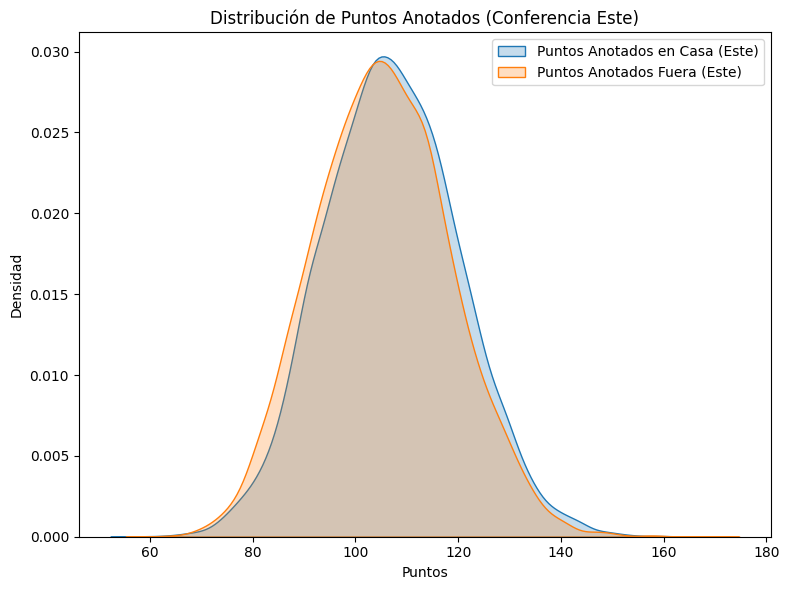

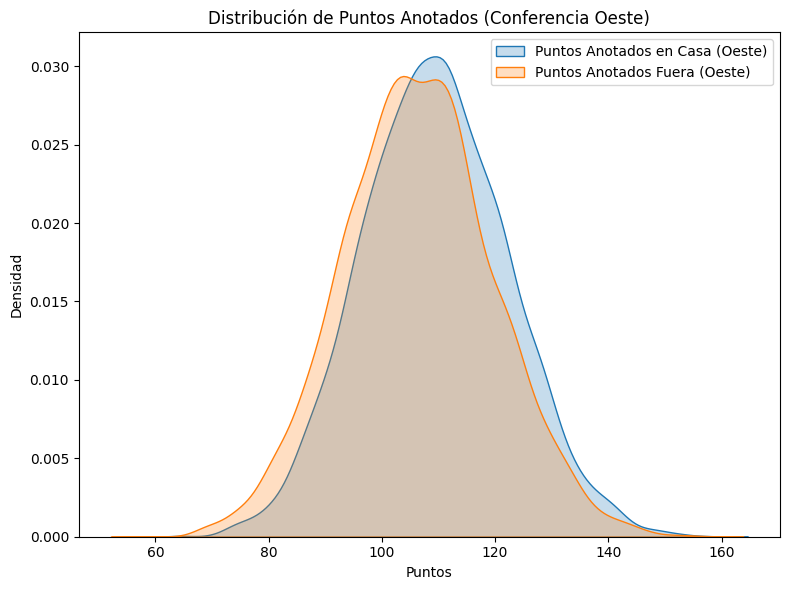

In [111]:
# Filtrar los datos por conferencia Este
game_data_este = game_data[game_data['team_name_home'].isin(conferencia_este)]
game_data_oeste = game_data[game_data['team_name_home'].isin(conferencia_oeste)]

# Gráfico de densidad para la conferencia Este
plt.figure(figsize=(8, 6))
sns.kdeplot(game_data_este['pts_home'], fill=True, label='Puntos Anotados en Casa (Este)')
sns.kdeplot(game_data_este['pts_away'], fill=True, label='Puntos Anotados Fuera (Este)')
plt.title('Distribución de Puntos Anotados (Conferencia Este)')
plt.xlabel('Puntos')
plt.ylabel('Densidad')
plt.legend()
plt.tight_layout()
plt.show()

# Gráfico de densidad para la conferencia Oeste
plt.figure(figsize=(8, 6))
sns.kdeplot(game_data_oeste['pts_home'], fill=True, label='Puntos Anotados en Casa (Oeste)')
sns.kdeplot(game_data_oeste['pts_away'], fill=True, label='Puntos Anotados Fuera (Oeste)')
plt.title('Distribución de Puntos Anotados (Conferencia Oeste)')
plt.xlabel('Puntos')
plt.ylabel('Densidad')
plt.legend()
plt.tight_layout()
plt.show()


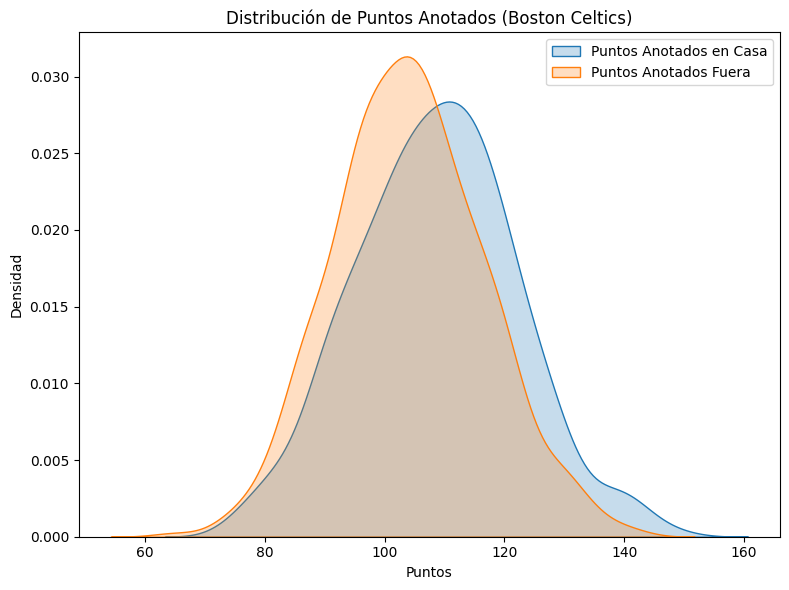

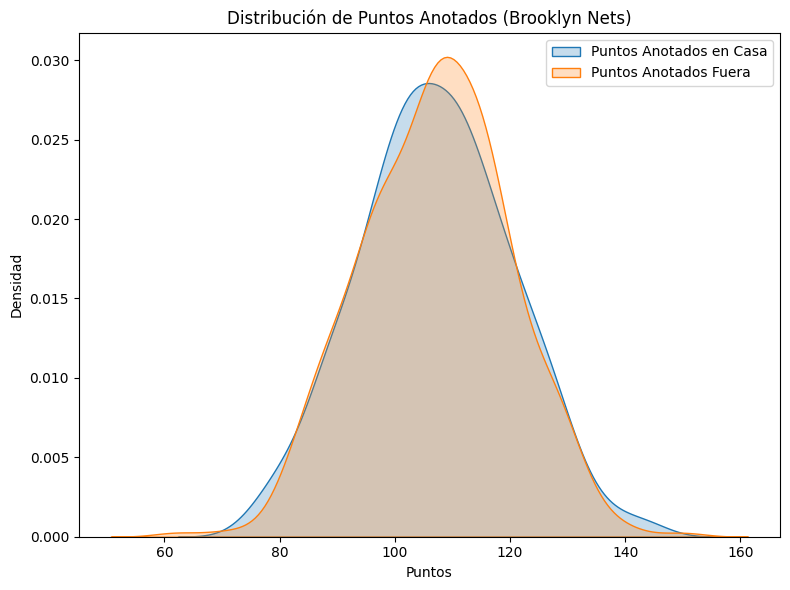

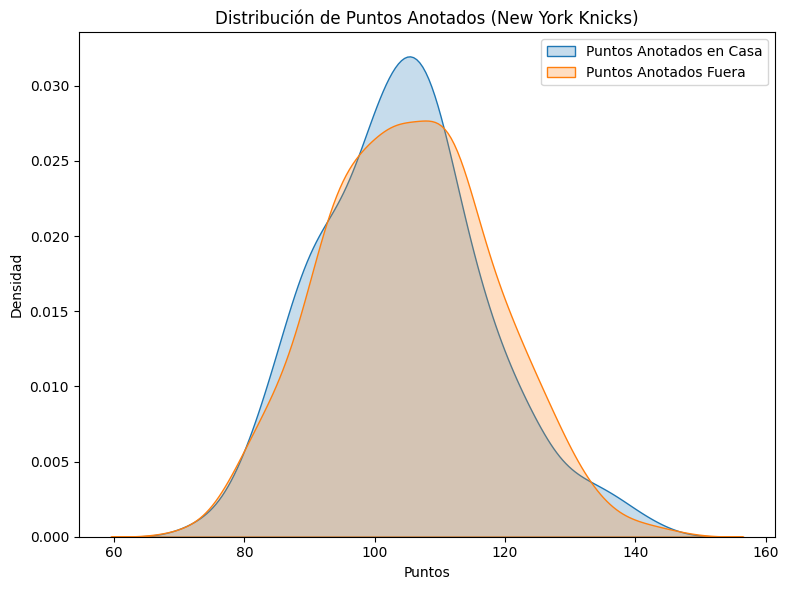

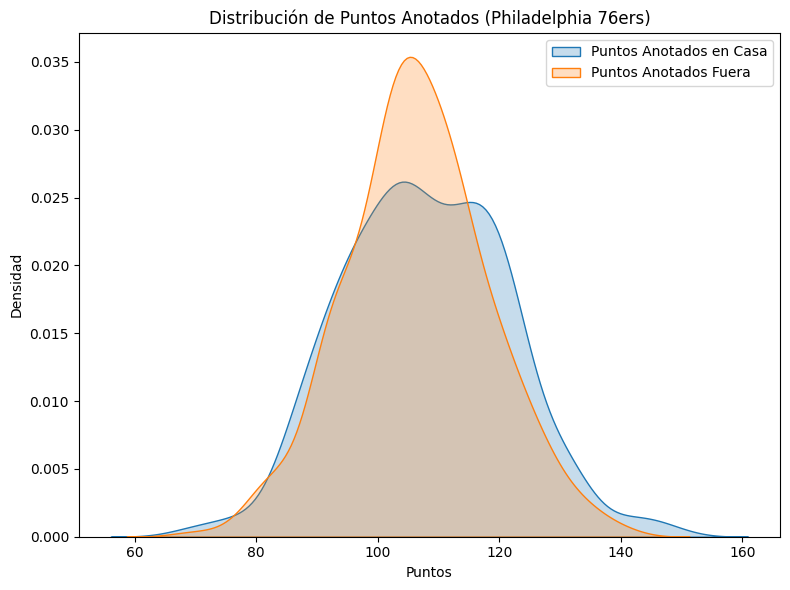

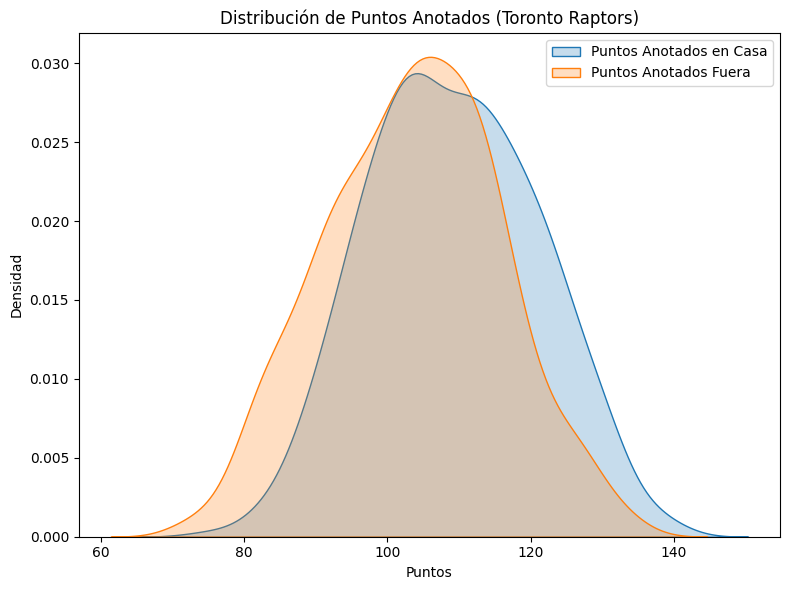

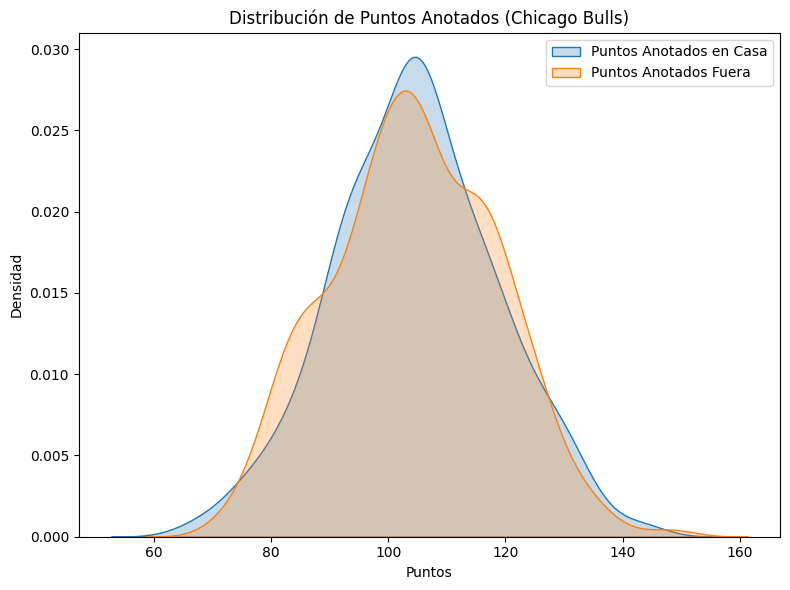

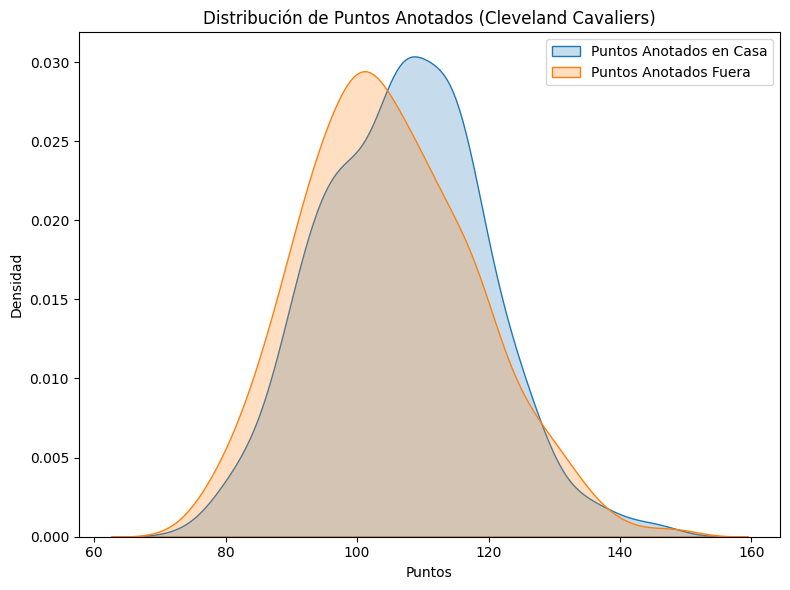

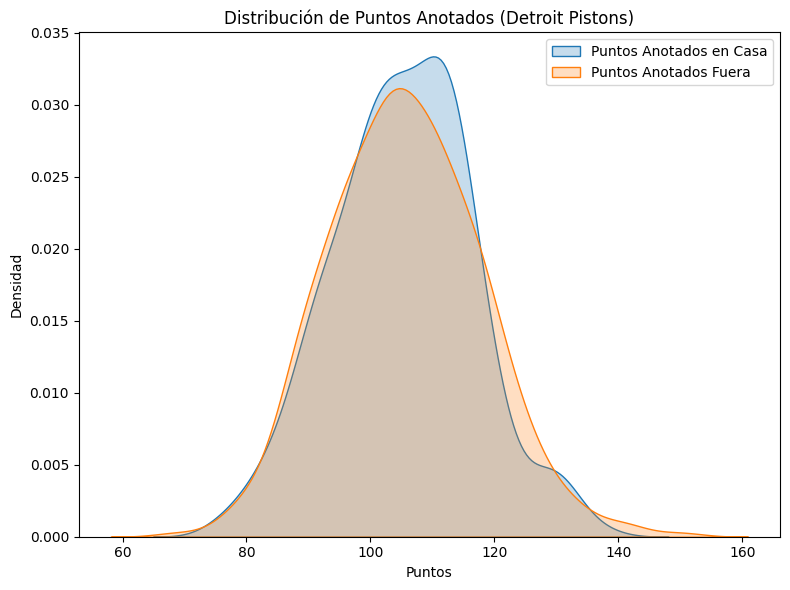

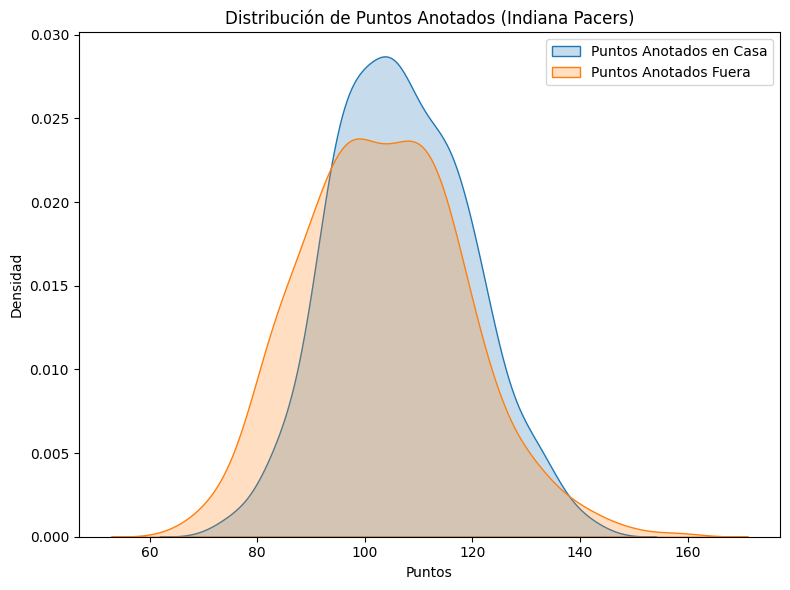

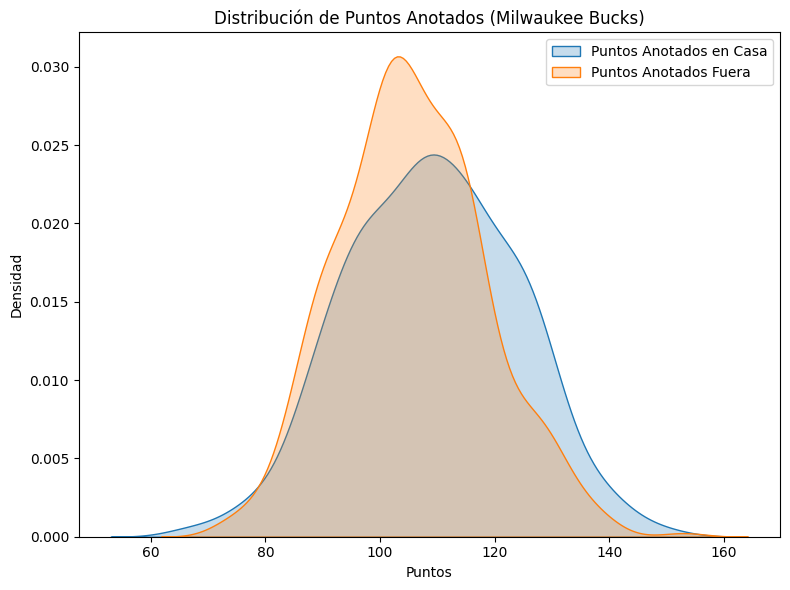

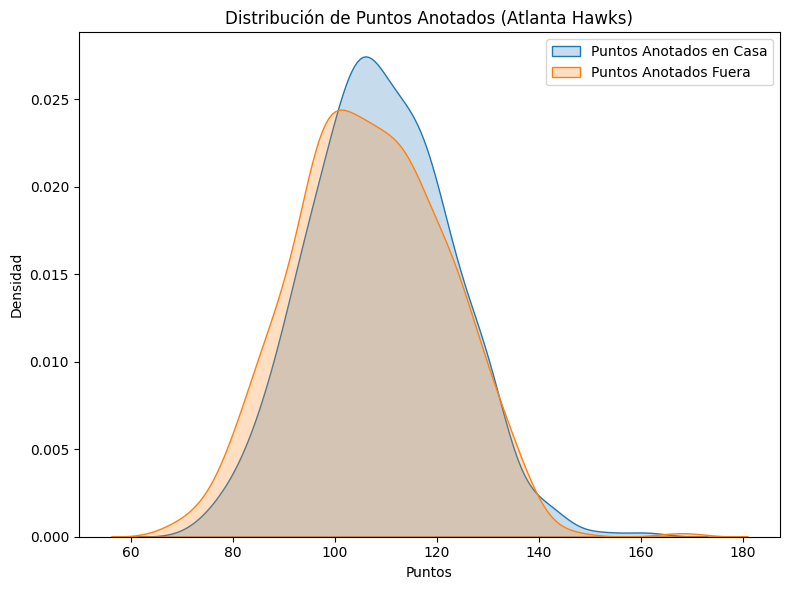

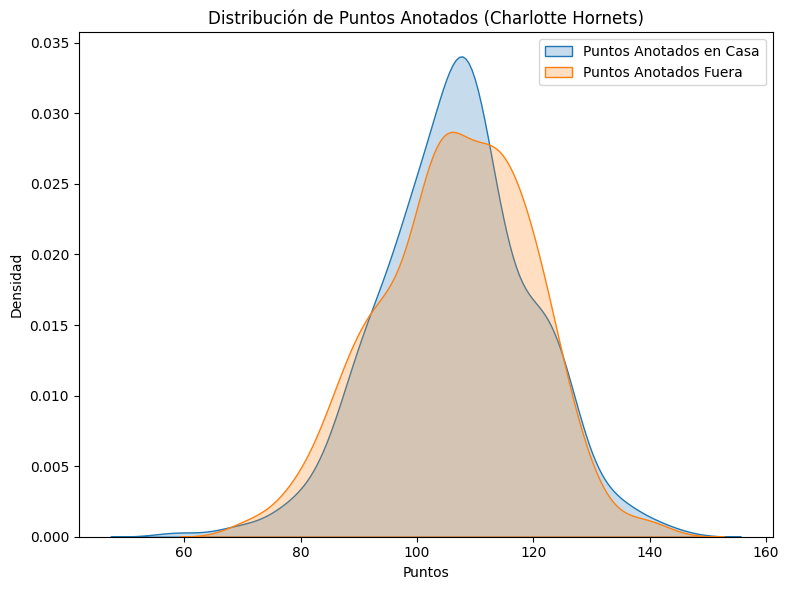

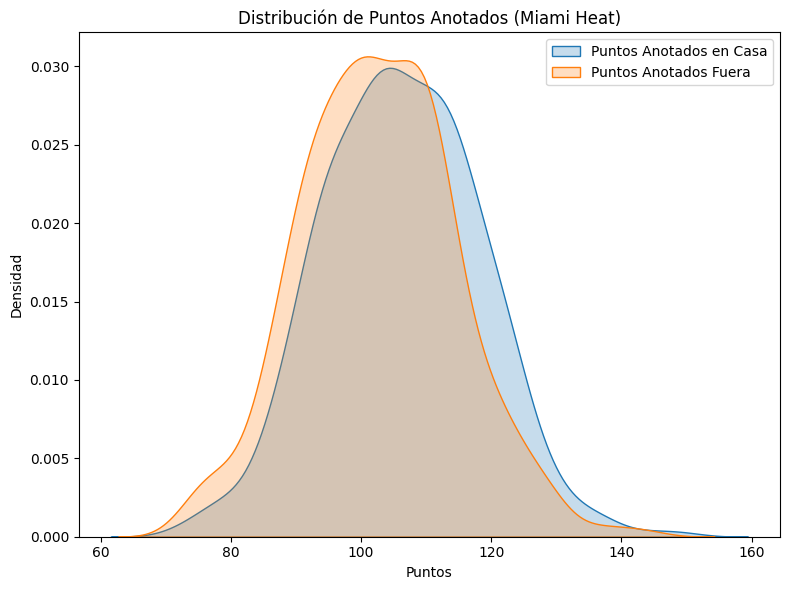

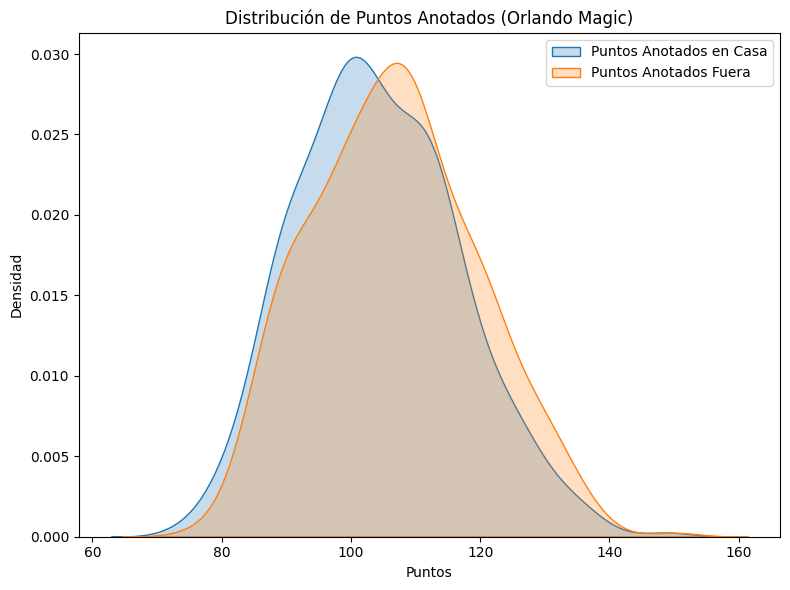

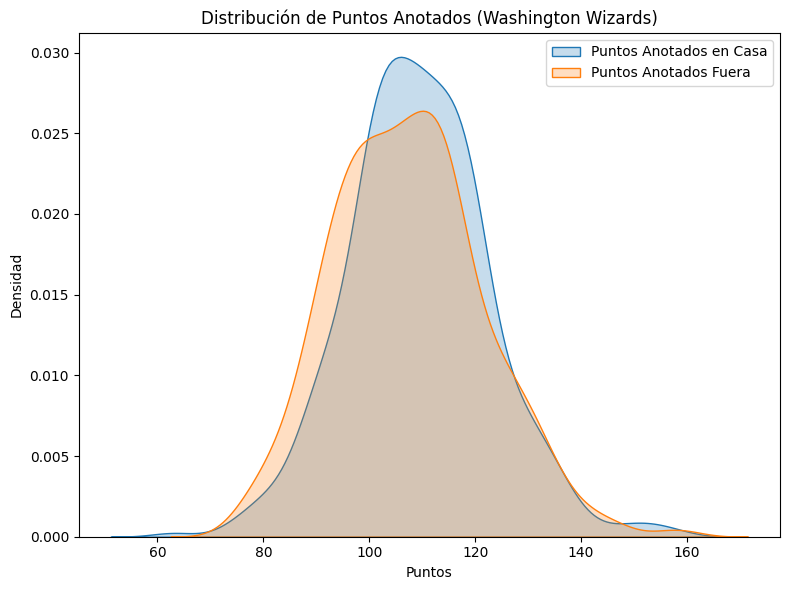

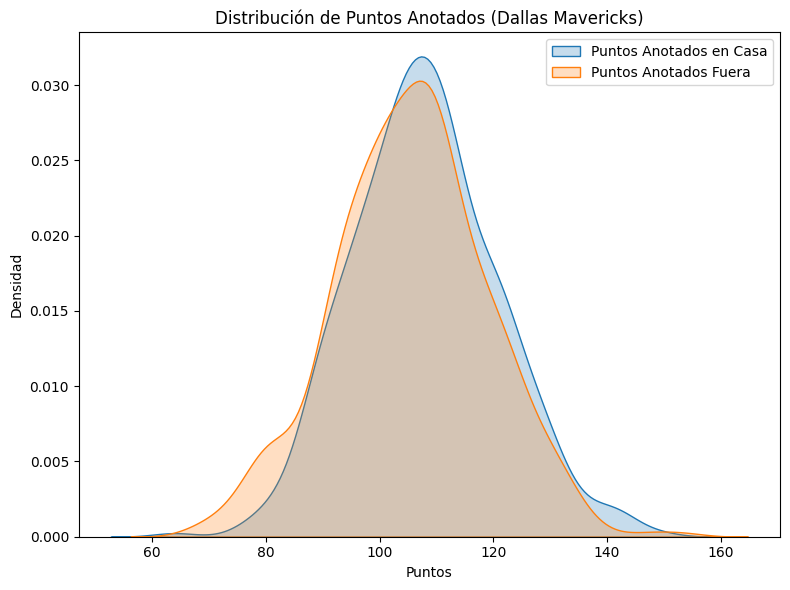

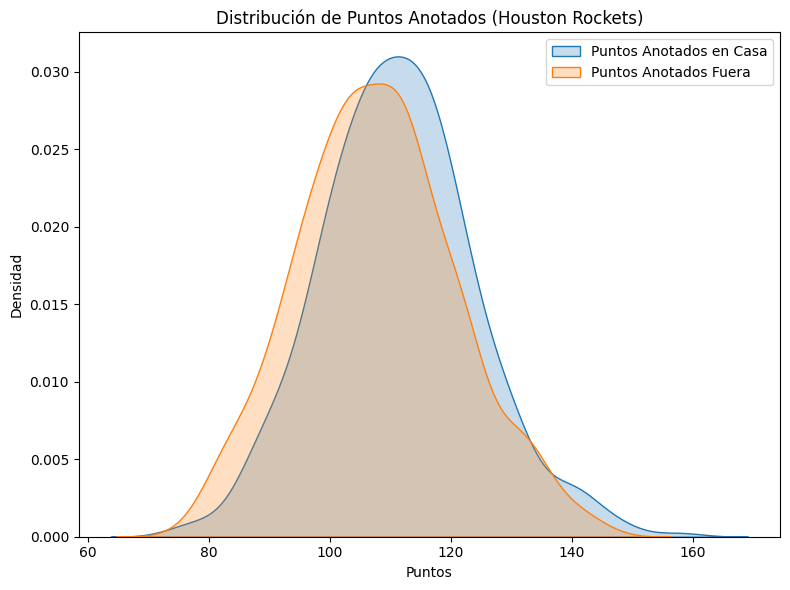

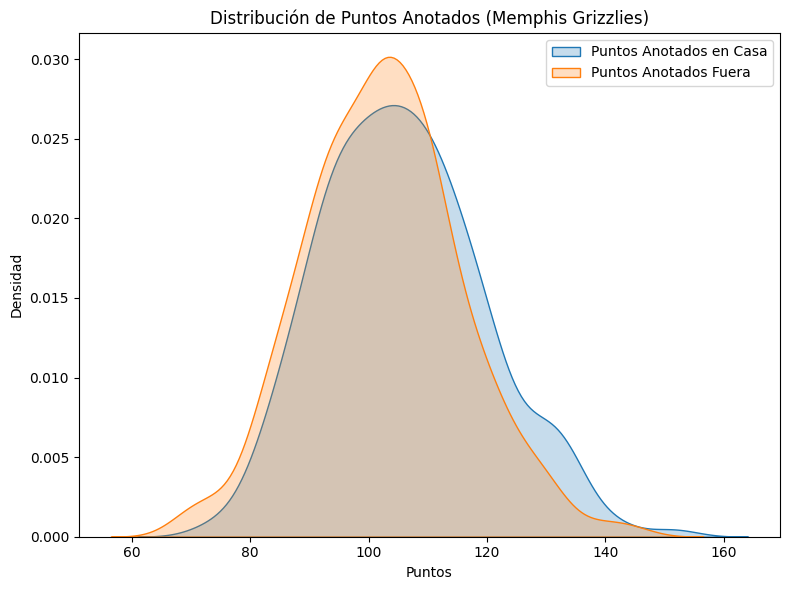

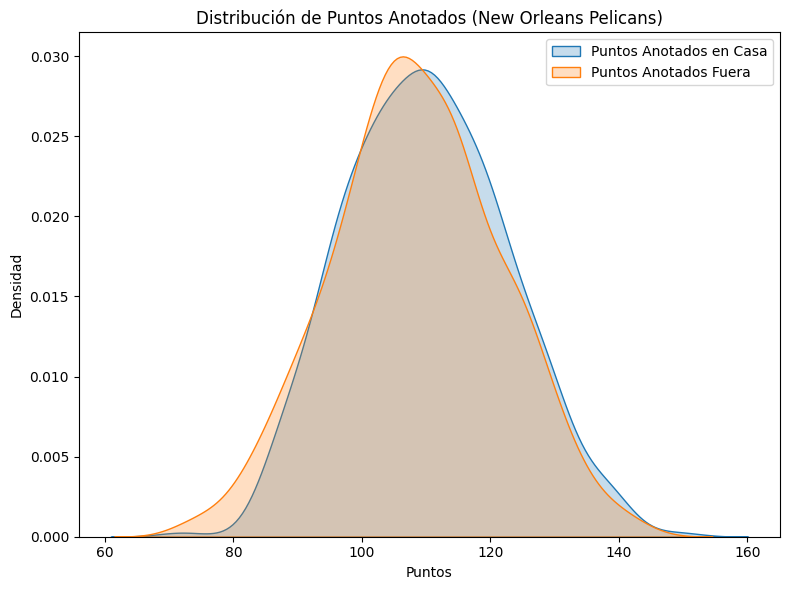

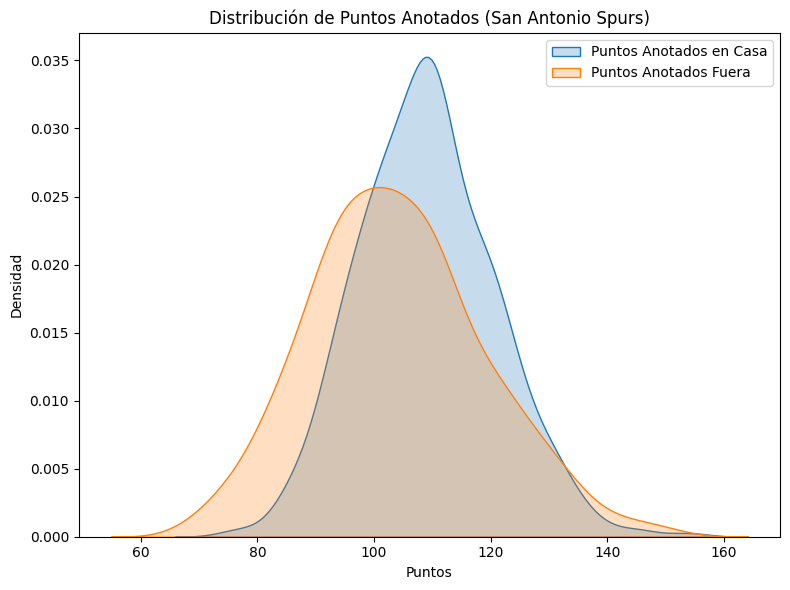

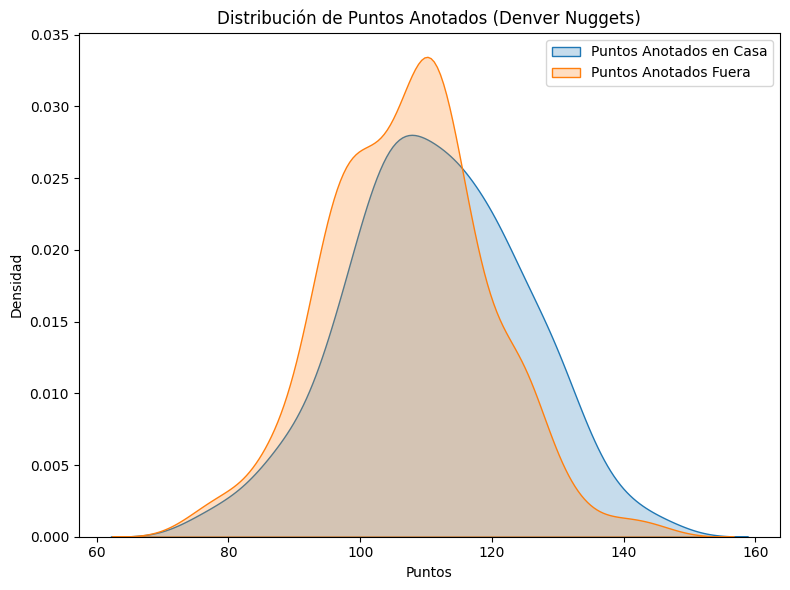

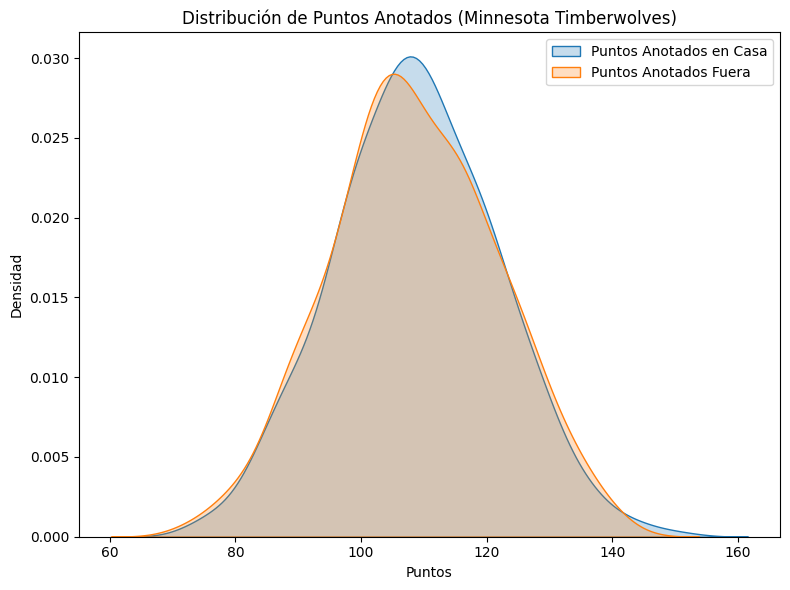

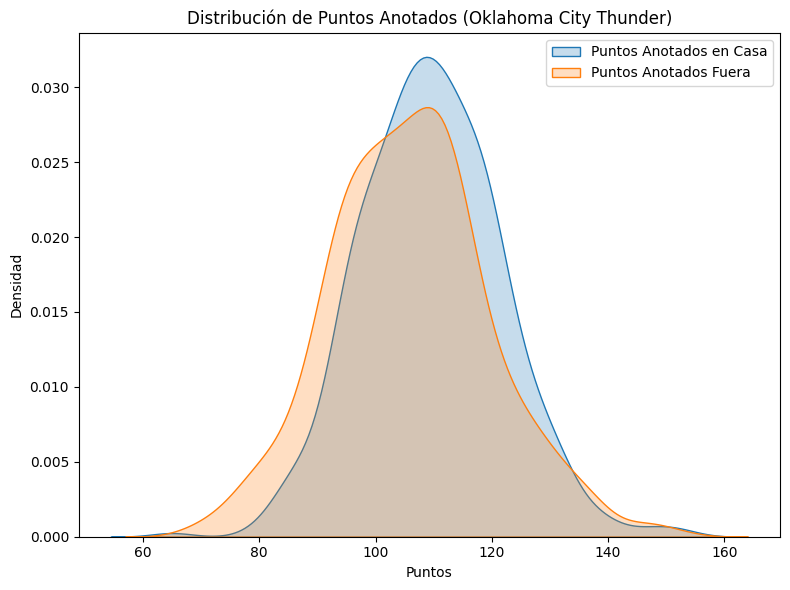

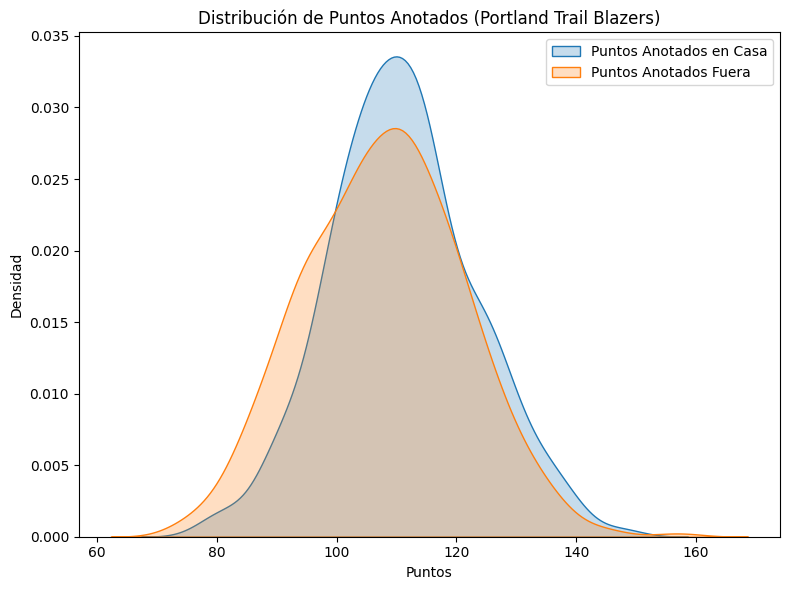

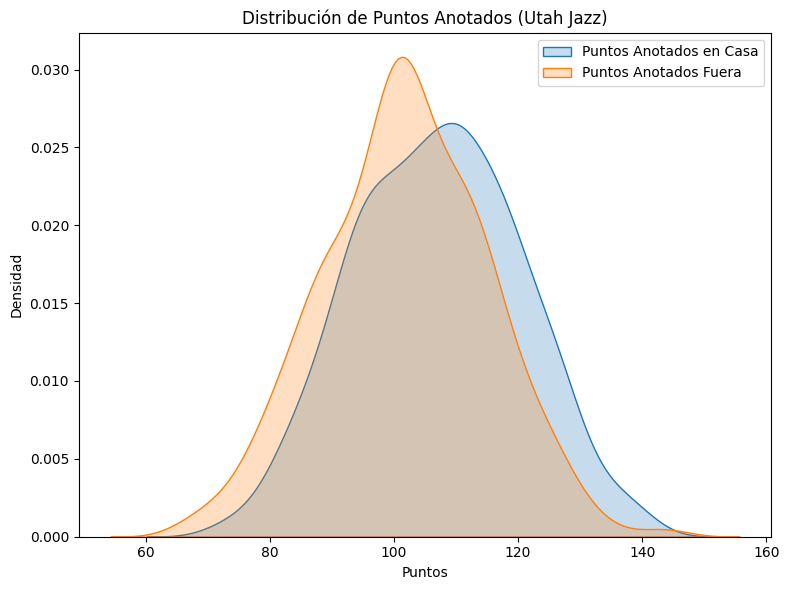

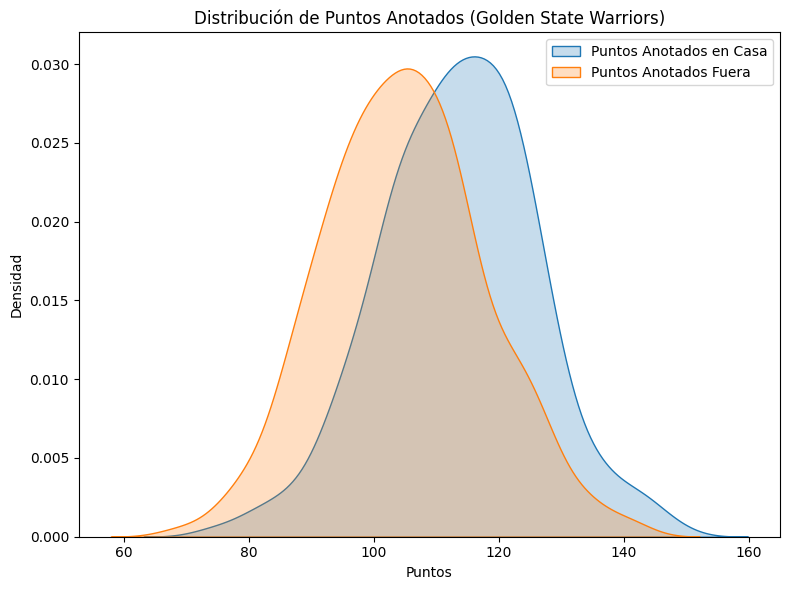

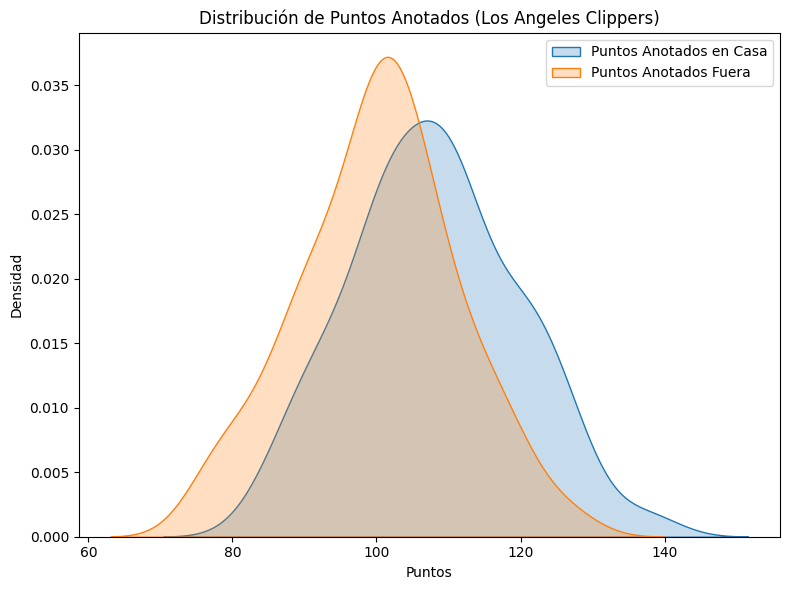

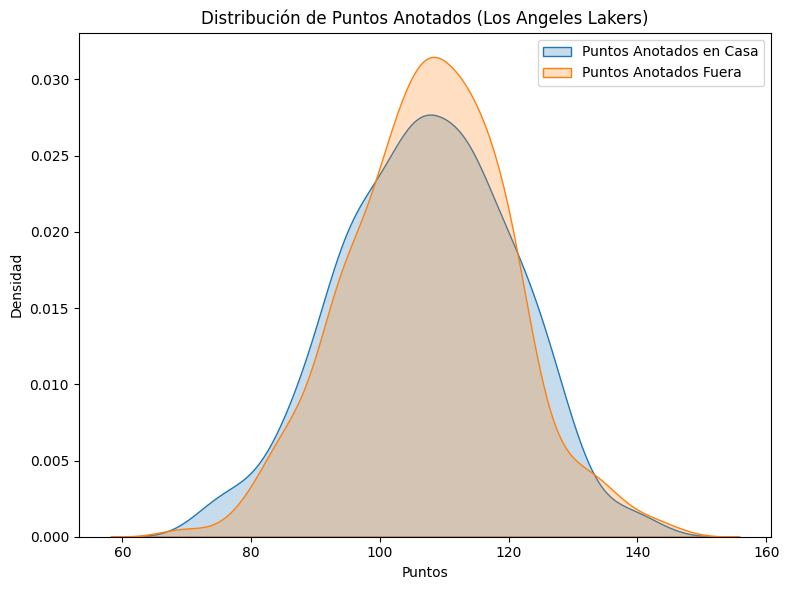

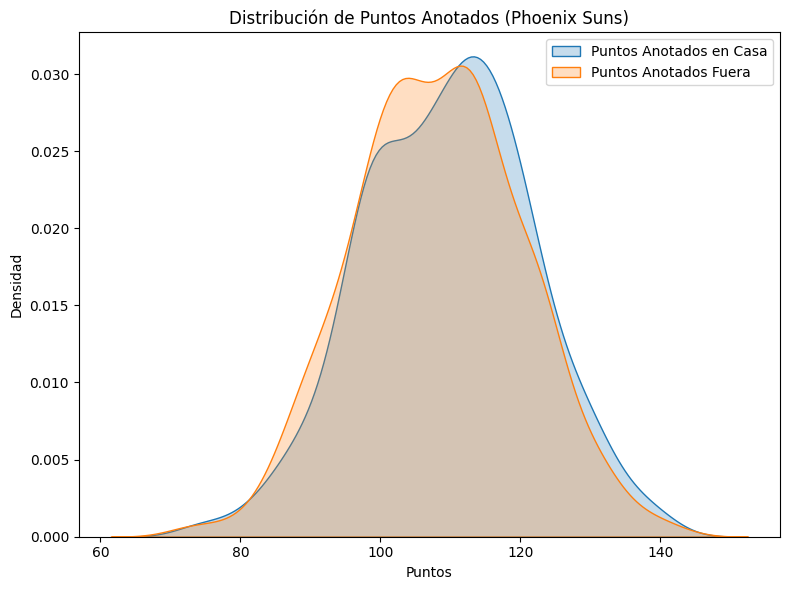

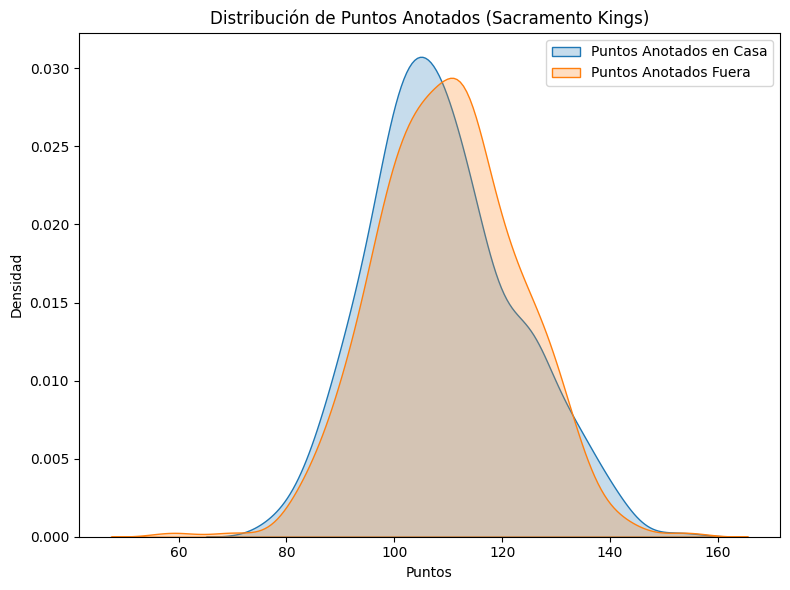

In [114]:
# Función para graficar densidad por equipo
def plot_density_by_team(team_data, team_name):
    plt.figure(figsize=(8, 6))
    sns.kdeplot(team_data['pts_home'], fill=True, label='Puntos Anotados en Casa')
    sns.kdeplot(team_data['pts_away'], fill=True, label='Puntos Anotados Fuera')
    plt.title(f'Distribución de Puntos Anotados ({team_name})')
    plt.xlabel('Puntos')
    plt.ylabel('Densidad')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Graficamos densidad por equipo para conferencia Este
for team in conferencia_este:
    team_data = game_data[game_data['team_name_home'] == team]
    plot_density_by_team(team_data, team)

# Graficamos densidad por equipo para conferencia Oeste
for team in conferencia_oeste:
    team_data = game_data[game_data['team_name_home'] == team]
    plot_density_by_team(team_data, team)


Promedio de puentos anotados por equipo y por conferencia

<Figure size 1200x800 with 0 Axes>

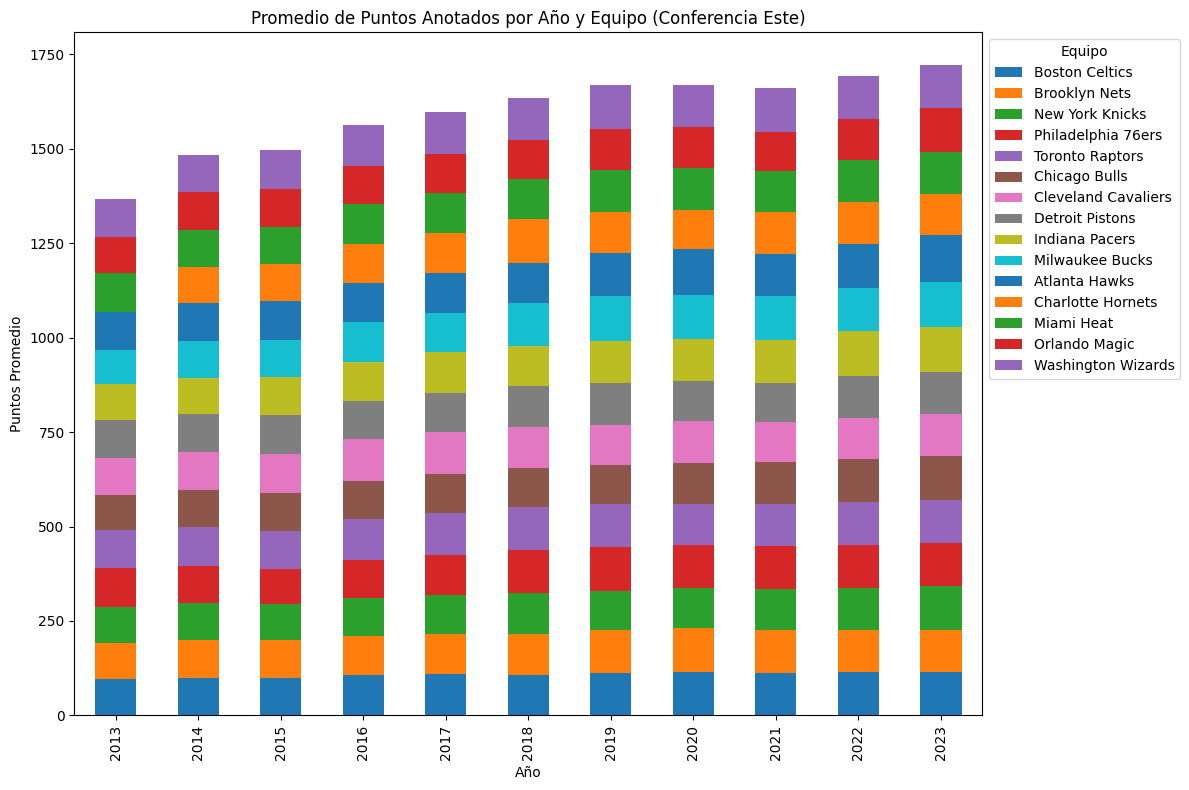

<Figure size 1200x800 with 0 Axes>

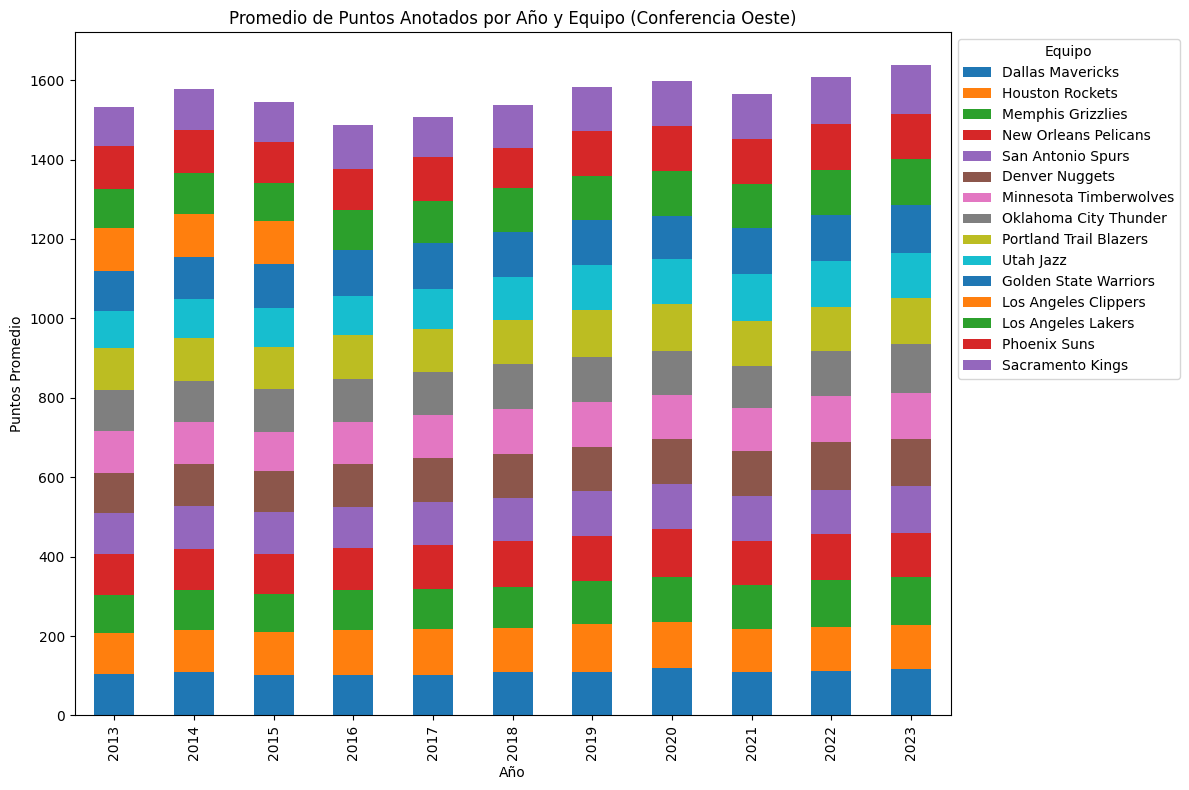

In [109]:
# Calculamos el promedio de puntos por año y equipo
points_by_team_per_year = game_data.groupby(['year', 'team_name_home'])['pts_home'].mean().unstack()

# Filtramos los equipos por conferencia Este
points_by_team_per_year_este = points_by_team_per_year[conferencia_este]

# Filtramos los equipos por conferencia Oeste
points_by_team_per_year_oeste = points_by_team_per_year[conferencia_oeste]

# Graficamos los promedios de puntos por año y equipo para la conferencia Este
plt.figure(figsize=(12, 8))
points_by_team_per_year_este.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Promedio de Puntos Anotados por Año y Equipo (Conferencia Este)')
plt.xlabel('Año')
plt.ylabel('Puntos Promedio')
plt.legend(title='Equipo', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

# Graficamos los promedios de puntos por año y equipo para la conferencia Oeste
plt.figure(figsize=(12, 8))
points_by_team_per_year_oeste.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Promedio de Puntos Anotados por Año y Equipo (Conferencia Oeste)')
plt.xlabel('Año')
plt.ylabel('Puntos Promedio')
plt.legend(title='Equipo', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


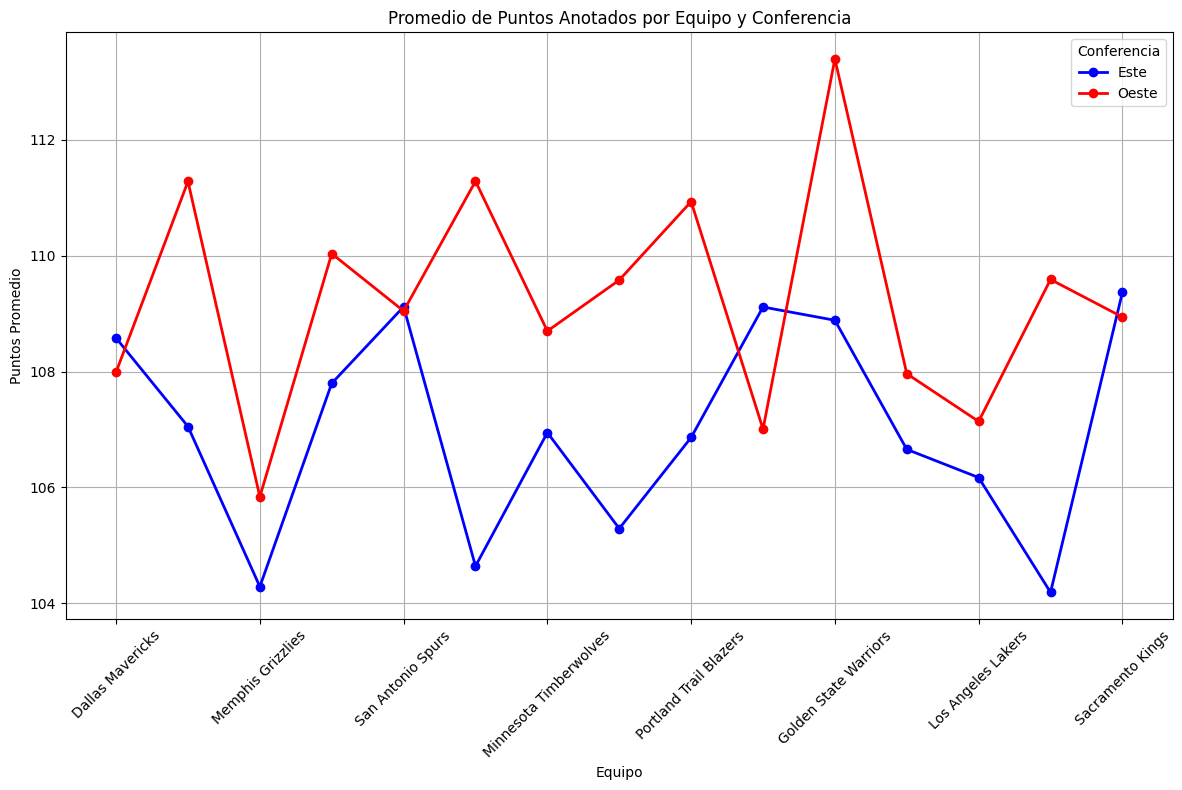

In [92]:
# EDA basado en conferencias

# Ejemplo de análisis de puntos promedio por equipo a lo largo de la temporada
# 1. Calcular promedio de puntos por equipo y fecha
points_by_team_over_time = game_data.groupby(['game_date', 'team_name_home'])['pts_home'].mean().unstack()

# 2. Filtrar por equipos de conferencias Este y Oeste
conferencia_este = equipos_nba["Este"]
conferencia_oeste = equipos_nba["Oeste"]

# Filtrar solo los equipos presentes en points_by_team_over_time
equipos_presentes = [equipo for equipo in conferencia_este + conferencia_oeste if equipo in points_by_team_over_time.columns]

points_by_team_conference_over_time = points_by_team_over_time[equipos_presentes]

# 3. Graficar puntos promedio por equipo y conferencia a lo largo de la temporada
plt.figure(figsize=(12, 8))

# Colores para cada conferencia
colores = {'Este': 'blue', 'Oeste': 'red'}

# Iterar sobre las conferencias y graficar los puntos promedio por equipo
for conferencia in ['Este', 'Oeste']:
    subset = points_by_team_conference_over_time[equipos_nba[conferencia]]
    subset.mean().plot(kind='line', marker='o', linestyle='-', color=colores[conferencia], label=conferencia, linewidth=2)

# Añadir título y etiquetas
plt.title('Promedio de Puntos Anotados por Equipo y Conferencia')
plt.xlabel('Equipo')
plt.ylabel('Puntos Promedio')
plt.xticks(rotation=45)
plt.legend(title='Conferencia')
plt.grid(True)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# 4. Realizar otros análisis comparativos según tus necesidades (porcentaje de tiros de campo, rebotes, etc.)

# Ejemplo de comparación de porcentaje de tiros de campo por conferencia
# ...


